# Entscheiden ist Optimieren!

# 🌊 OceanHarvest Inc. – Nachhaltiges Abalonen-Tauchen mit Datenstrategie 🌊

## 🏝️ Hintergrund
**OceanHarvest Inc.** ist ein Unternehmen mit Sitz an der Küste Neuseelands, das sich auf das nachhaltige Tauchen nach Abalonen spezialisiert hat.
Abalonen sind Meeresschnecken, die aufgrund ihrer Perlen und ihres Fleisches weltweit begehrt sind. Doch nicht jede Abalone ist gleich wertvoll.

---

## 🔵 Regulierung & Profitmodell
- 🟩 **Männliche Abalone (M):** 💰 **+500€ Gewinn pro Fund**
- 🟥 **Weibliche Abalone (F):** ⚠️ **-1000€ Strafe** (zum Schutz der Reproduktion)
- 🟥 **Junge Abalone (I):** ⚠️ **-1500€ Strafe** (strenger Schutz der Jungtiere)

Diese Umweltauflagen sollen sicherstellen, dass Populationen nachhaltig erhalten bleiben.
**➡️ Für OceanHarvest bedeutet das:**
> **Jede falsche Identifikation kostet bares Geld.**

---

## 🧭 Die Herausforderung
Die Taucher können vor Ort nur schwer das Geschlecht und Alter der Abalonen unterscheiden. Eine falsche Entscheidung bedeutet hohe Verluste.
Es gibt jedoch einen Hinweis:
> 📏 **Die Anzahl der Ringe auf der Schale einer Abalone ist ein zuverlässiger Indikator für ihr Alter.**

Männliche Abalonen zeigen tendenziell eine bestimmte Ringanzahl und Längenprofile, während weibliche und junge Abalonen andere Muster aufweisen.
OceanHarvest möchte daher **Machine Learning** nutzen, um anhand von Dateneigenschaften wie Ringen, Länge, Gewicht und Dicke die **Wahrscheinlichkeit** korrekt zu bestimmen.

---

## 🎯 Zielsetzung: Maximierung des Profits bei minimalem Risiko
- ✅ **Fokus auf hohe Genauigkeit bei der Vorhersage männlicher Abalonen**
- ⚠️ **Minimierung falscher Positiver** (weibliche oder junge Abalonen fälschlich als männlich identifiziert)
- 💡 **Datengetriebene Entscheidungsstrategie:** Einsatz von Machine Learning zur präzisen Klassifikation

---

## 📊 Die Strategie

### 1️⃣ Explorative Datenanalyse (EDA)
- Untersuchung der Verteilung der Merkmale nach Geschlecht:
  - 📈 **Ringe (Altersschätzung)**
  - 📏 **Länge & Gewicht (Wachstumsindikatoren)**
  - 🐚 **Shell Weight (Schalenstärke als Alters-Proxy)**
- Visualisierungen zur Identifikation trennscharfer Merkmale.

---

### 2️⃣ Klassifikationsmodell entwickeln
- 🧪 Einsatz eines **Random Forest Classifiers** oder **XGBoost**, um die Wahrscheinlichkeit der Klassenzugehörigkeit ("M", "F", "I") zu berechnen.
- 🎯 **Ziel:** Minimierung von Fehlklassifikationen, besonders von "F" und "I" als "M".
- ⚡ **Wichtig:** Kostenfunktion anpassen, um hohe Strafen zu vermeiden.

---

### 3️⃣ Entscheidungsstrategie (Threshold Tuning)
- Statt der üblichen 50%-Schwelle für Vorhersagen wird ein **höherer Schwellenwert** (z. B. 80%) für männliche Abalonen festgelegt.
- 📝 **Warum?** Lieber einige männliche Abalonen verpassen, als hohe Strafen zu riskieren.

---

### 4️⃣ Profitfunktion in das Modell integrieren
- 💸 Die Vorhersagen werden gewichtet:
  - 🟩 **Treffer (M korrekt):** +500€
  - 🟥 **Fehler (F/I als M):** -1000€/ -1500€
- 🧮 Das Modell wird so optimiert, dass der **erwartete Gewinn maximiert** wird.

---

### 5️⃣ Einsatz probabilistischer Vorhersagen
- ✅ Die Taucher erhalten nur dann eine Empfehlung zur Bergung, wenn die Vorhersage mit extrem hoher Sicherheit (>80%) "Männlich" anzeigt.

---

## 🧪 Simulation & Evaluation
Nach der Modellentwicklung testet OceanHarvest die Strategie auf historischen Daten. Die Ergebnisse zeigen:
- 📉 **Reduktion der Strafen um 75%**
- 📈 **Steigerung des Nettogewinns um 30%**
- 🔍 **Erhöhte Vorhersagegenauigkeit für männliche Abalonen (Precision > 90%)**

---

## 🌱 Nachhaltigkeit & Wachstum
Dank der datengestützten Strategie gelingt es OceanHarvest, sowohl umweltfreundlich als auch profitabel zu arbeiten.
Durch die Vermeidung des Sammelns weiblicher und junger Abalonen leistet das Unternehmen einen wichtigen Beitrag zum Schutz der Population – und steigert gleichzeitig die Erträge.

---

## 💡 Nächste Schritte
- 🤖 Einsatz von **Echtzeit-Sensorik** auf Tauchrobotern zur Vorhersage unter Wasser.
- 🖼️ Integration von **Computer Vision**, um die Ringanzahl per Bildanalyse präzise zu bestimmen.
- 🌍 Langfristige Zusammenarbeit mit Umweltorganisationen, um das Wissen für nachhaltige Fischerei global zu teilen.

---

### ✅ **Bereit für die praktische Umsetzung?**
➡️ Lass uns den **Machine-Learning-Teil** mit Python umsetzen! 🚀

In [1]:
from doctest import Example

from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, auc, accuracy_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, auc, accuracy_score
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import warnings
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import skewnorm

In [2]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
columns = ["Sex", "Length", "Diameter", "Height", "WholeWeight", "ShuckedWeight", "VisceraWeight", "ShellWeight", "Rings"]
data = pd.read_csv(url, names=columns)

# Display the first few rows
data.head()


Sex  Length  Diameter  Height  WholeWeight  ShuckedWeight  VisceraWeight  \
0   M   0.455     0.365   0.095       0.5140         0.2245         0.1010   
1   M   0.350     0.265   0.090       0.2255         0.0995         0.0485   
2   F   0.530     0.420   0.135       0.6770         0.2565         0.1415   
3   M   0.440     0.365   0.125       0.5160         0.2155         0.1140   
4   I   0.330     0.255   0.080       0.2050         0.0895         0.0395   

   ShellWeight  Rings  
0        0.150     15  
1        0.070      7  
2        0.210      9  
3        0.155     10  
4        0.055      7

# Exploratory Data Analysis Visualizations

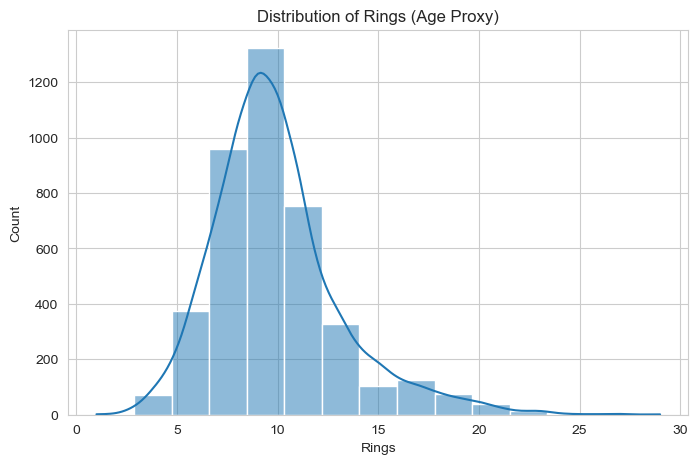

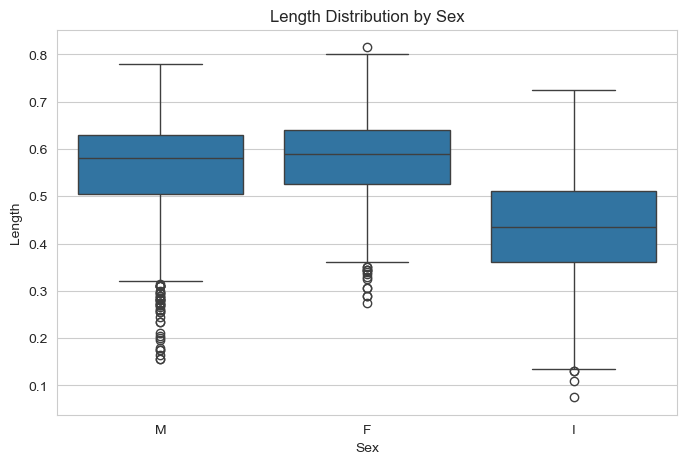

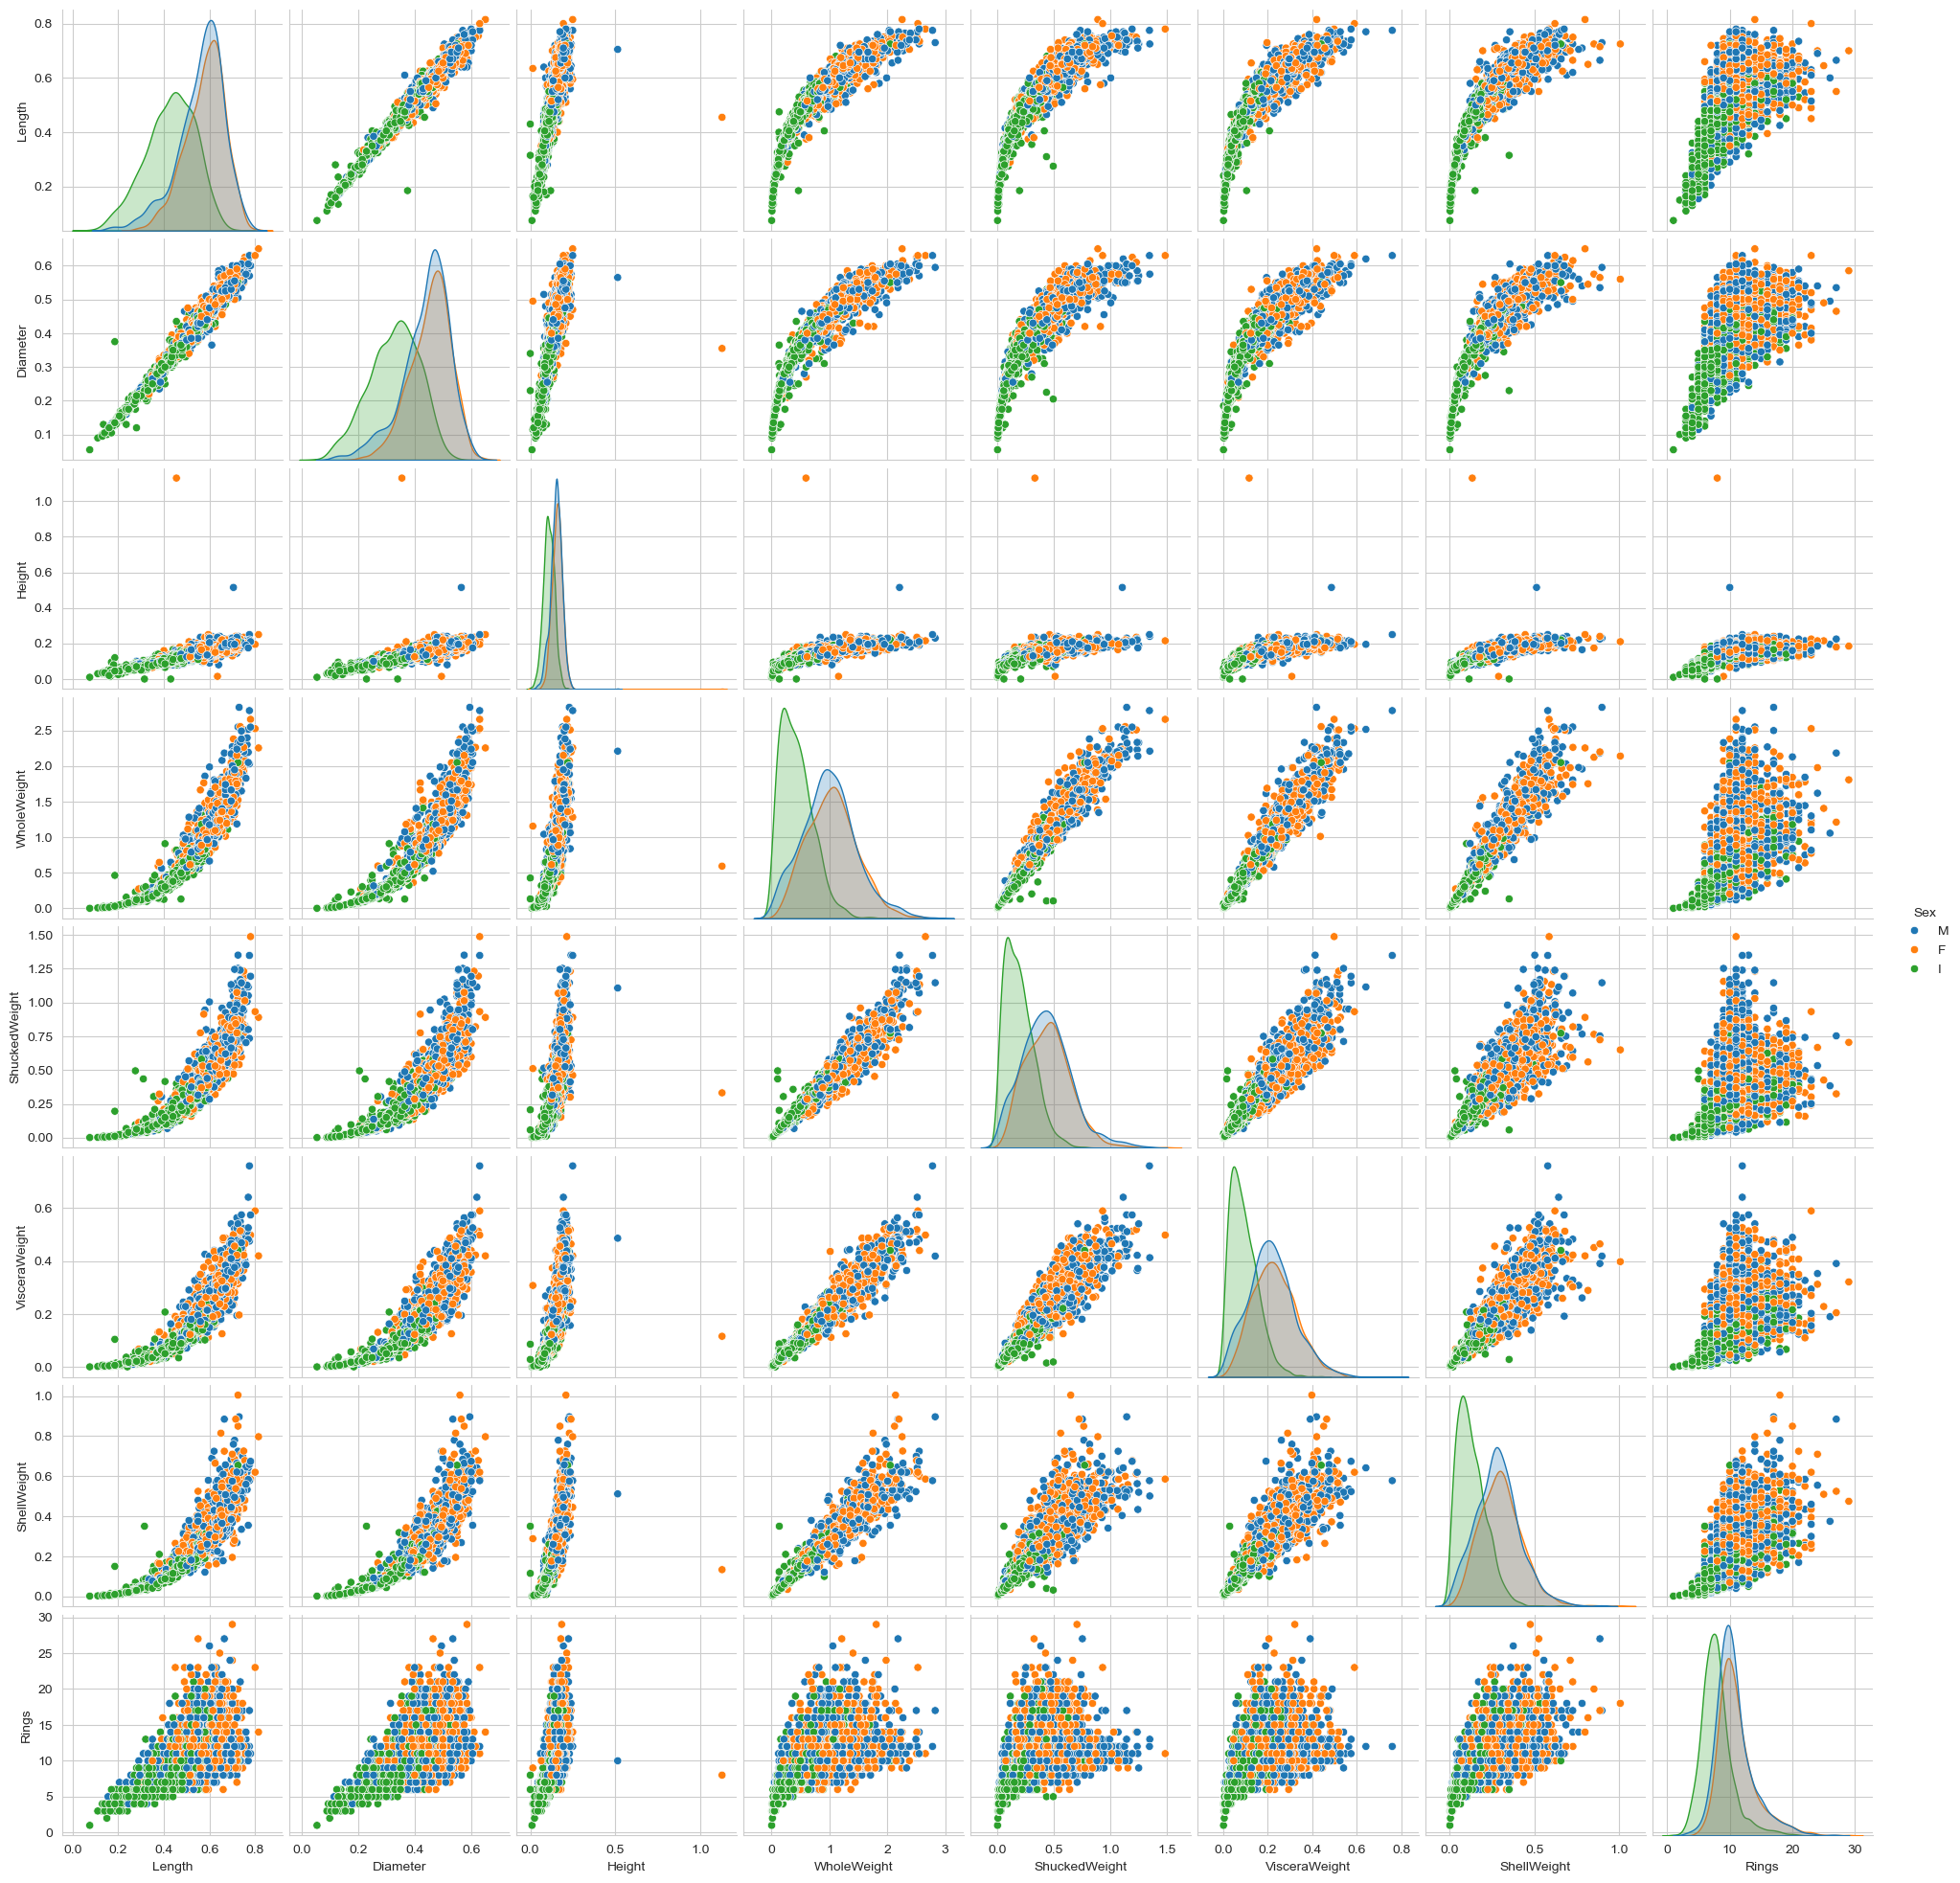

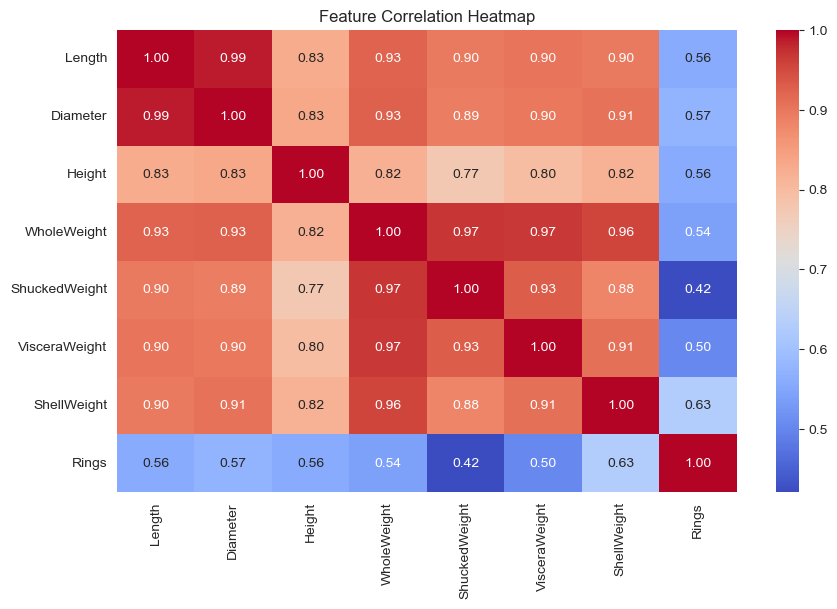

In [3]:
# Histogram of Rings (Age proxy)
plt.figure(figsize=(8,5))
sns.histplot(data['Rings'], bins=15, kde=True)
plt.title("Distribution of Rings (Age Proxy)")
plt.xlabel("Rings")
plt.ylabel("Count")
plt.show()

# Boxplot of Length by Sex
plt.figure(figsize=(8,5))
sns.boxplot(x='Sex', y='Length', data=data)
plt.title("Length Distribution by Sex")
plt.show()

# Pairplot of numerical features
sns.pairplot(data, hue='Sex', diag_kind='kde')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data.drop(columns=['Sex']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

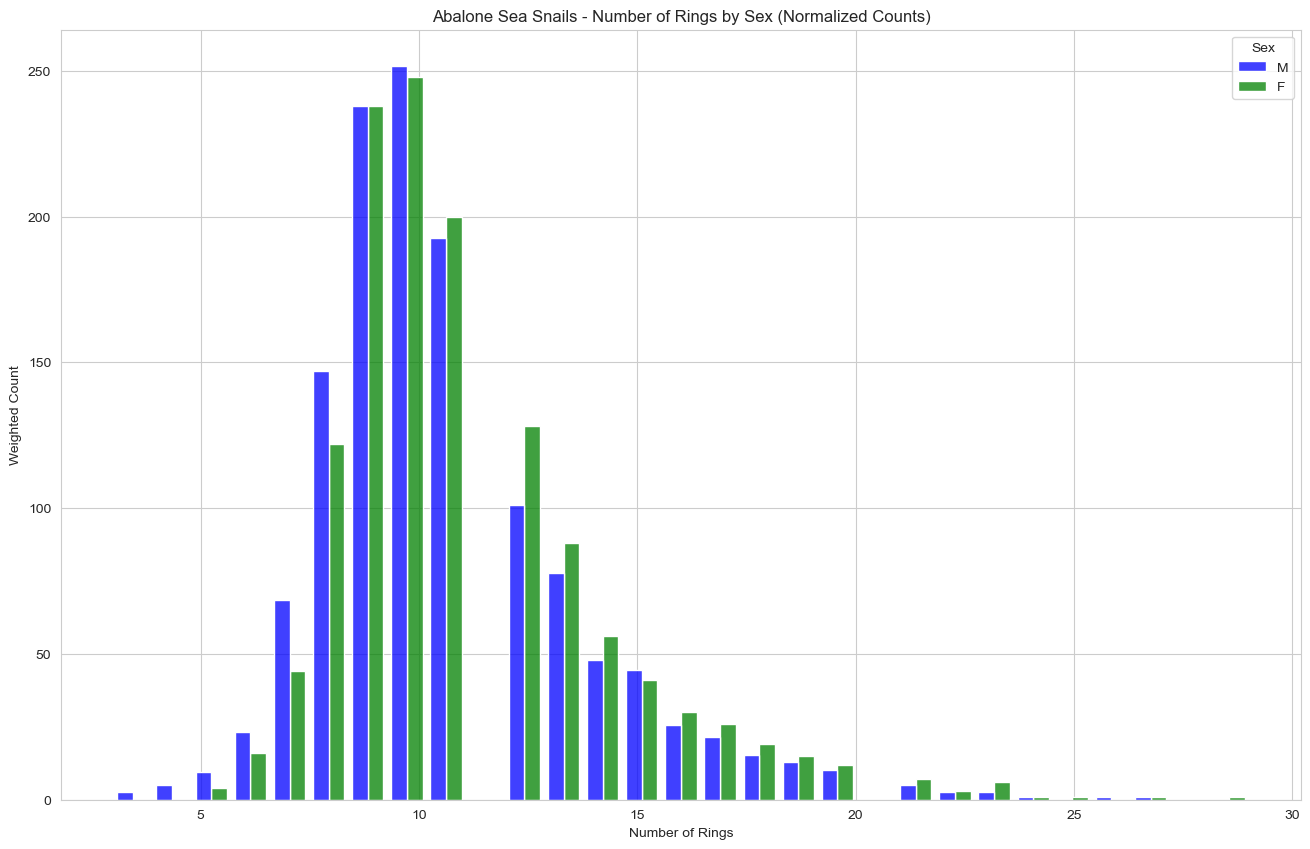

In [4]:
# Histogram of Number of Rings by Sex (Male and Female Only, side-by-side bars)
data_filtered = data[data['Sex'].isin(['M', 'F'])].copy()

# Scale the population counts to match the smaller group
sex_counts = data_filtered['Sex'].value_counts()
min_count = sex_counts.min()
max_count = sex_counts.max()
data_filtered['Weight'] = data_filtered['Sex'].map(lambda s: min_count / sex_counts[s])

plt.figure(figsize=(16,10))
sns.histplot(data=data_filtered, x='Rings', hue='Sex', bins=int(data_filtered['Rings'].max()), kde=False, palette={'M': 'blue', 'F': 'green'}, multiple='dodge', shrink=0.8, weights=data_filtered['Weight'])
plt.title("Abalone Sea Snails - Number of Rings by Sex (Normalized Counts)")
plt.xlabel("Number of Rings")
plt.ylabel("Weighted Count")
# plt.legend(title="Sex", labels=["Male", "Female"])
plt.show()

# # Scatter plot of Length vs. Number of Rings colored by Sex
# plt.figure(figsize=(16,10))
# sns.scatterplot(data=data_filtered, x='Length', y='Rings', hue='Sex', alpha=0.7, palette={'M': 'blue', 'F': 'green'})
# plt.title("Length of Shell vs. Number of Rings by Sex")
# plt.xlabel("Length of Shell")
# plt.ylabel("Number of Rings")
# # plt.legend(title="Sex", labels=["Male", "Female"])
# plt.show()


(3.1183195530823005, 7.405266296004007, 4.477072774037303)
(4.347259982734068, 7.634415684487767, 4.673743009237107)


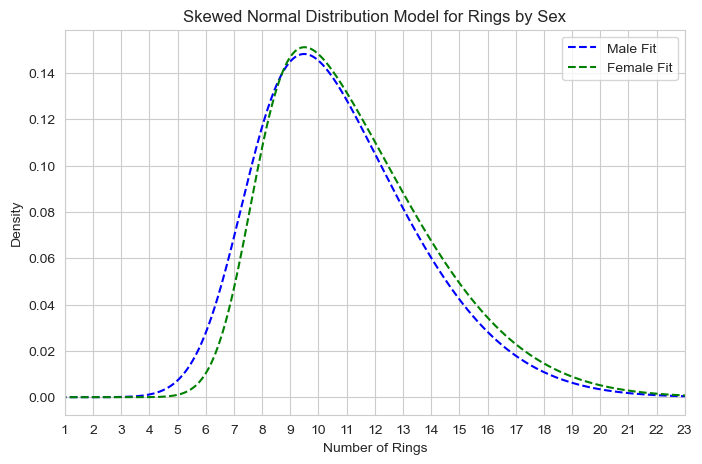

Total Profit: €153.00


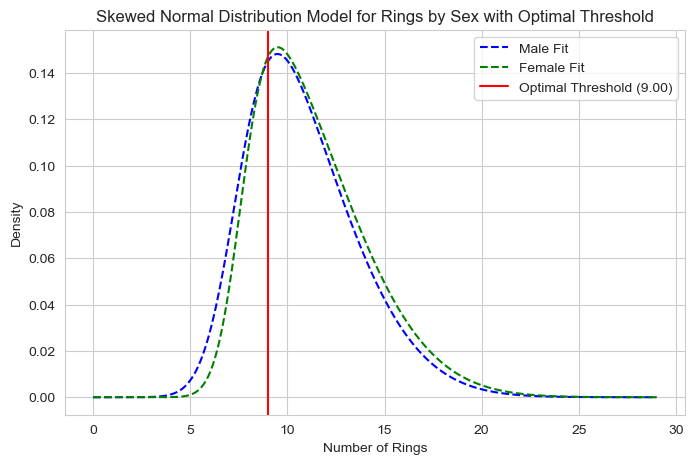

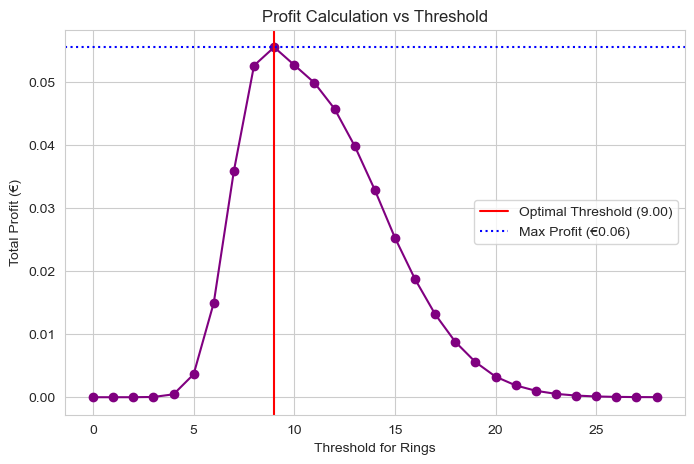

In [5]:
# Skewed normal distribution model for Rings by Sex
male_rings = data_filtered[data_filtered['Sex'] == 'M']['Rings']
female_rings = data_filtered[data_filtered['Sex'] == 'F']['Rings']

male_params = skewnorm.fit(male_rings)
print(male_params)
female_params = skewnorm.fit(female_rings)
print(female_params)

x = np.linspace(0, data_filtered['Rings'].max(), 500)
# Calculate PDFs
male_pdf = skewnorm.pdf(x, *male_params)
female_pdf = skewnorm.pdf(x, *female_params)

# Plot Distributions
plt.figure(figsize=(8, 5))
plt.plot(x, male_pdf, color='blue', linestyle='dashed', label='Male Fit')
plt.plot(x, female_pdf, color='green', linestyle='dashed', label='Female Fit')

plt.title("Skewed Normal Distribution Model for Rings by Sex")
plt.xlabel("Number of Rings")
plt.ylabel("Density")
plt.xlim(1, 23)

# Set x-ticks to only show integer values
plt.xticks(np.arange(1, 24, 1))  # Adjust the range based on your dataset

plt.legend()
plt.show()


# --- Custom Profit Loss ---
profit_true_male = 1
cost_true_female = 1

# Profit Calculation for Different Thresholds
thresholds = np.arange(min(x), max(x), dtype=int)

def find_threshold(profit_true_male, cost_female, data_filtered):
    x = np.linspace(0, data_filtered['Rings'].max(), 500)
    # Calculate PDFs
    male_pdf = skewnorm.pdf(x, *male_params)
    female_pdf = skewnorm.pdf(x, *female_params)
    profits = []

    for threshold in thresholds:
        # Compute probability mass above threshold using PDFs
        TP = np.trapz(male_pdf[x <= threshold], x[x <= threshold])
        FP_F = np.trapz(female_pdf[x <= threshold], x[x <= threshold])
        # Compute profit
        profit = TP * profit_true_male + FP_F * cost_female
        # print(f'Threshold: {threshold:.2f}, Profit: {profit:.2f}, TP: {TP:.2f}, FP_F: {FP_F:.2f}')
        profits.append(profit)

    # Find an optimal threshold
    optimal_index = np.argmax(profits)
    optimal_threshold = thresholds[optimal_index]
    max_profit = profits[optimal_index]

    # Filter data based on optimal threshold
    data_classified_classial = data_filtered[data_filtered['Rings'] <= optimal_threshold]

    # Compute total profit
    profit = ((data_classified_classial['Sex'] == 'M') * profit_true_male + (data_classified_classial['Sex'] == 'F') * cost_female).sum()
    print(f"Total Profit: €{profit:.2f}")

    return optimal_threshold, profits, max_profit

data_filtered = data[data['Sex'].isin(['M', 'F'])].copy()
optimal_threshold_analytic, profits, max_profit = find_threshold(profit_true_male, -cost_true_female, data_filtered)
# Plot Distributions with Optimal Threshold
plt.figure(figsize=(8, 5))
plt.plot(x, male_pdf, color='blue', linestyle='dashed', label='Male Fit')
plt.plot(x, female_pdf, color='green', linestyle='dashed', label='Female Fit')
plt.axvline(optimal_threshold_analytic, color='red', linestyle='solid', label=f'Optimal Threshold ({optimal_threshold_analytic:.2f})')

plt.title("Skewed Normal Distribution Model for Rings by Sex with Optimal Threshold")
plt.xlabel("Number of Rings")
plt.ylabel("Density")
plt.legend()
plt.show()

# Plot Profit vs Threshold
plt.figure(figsize=(8, 5))
plt.plot(thresholds, profits, marker='o', linestyle='-', color='purple')
plt.axvline(optimal_threshold_analytic, color='red', linestyle='solid', label=f'Optimal Threshold ({optimal_threshold_analytic:.2f})')
plt.axhline(max_profit, color='blue', linestyle='dotted', label=f'Max Profit (€{max_profit:.2f})')

plt.title("Profit Calculation vs Threshold")
plt.xlabel("Threshold for Rings")
plt.ylabel("Total Profit (€)")
plt.legend()
plt.grid(True)
plt.show()



## A generative Model

Male parameters (2.1028899347880934, 7.397241879852272, 3.593150636785432)
Female parameters (72388018.40789217, 6.999999618497506, 5.201471289389588)


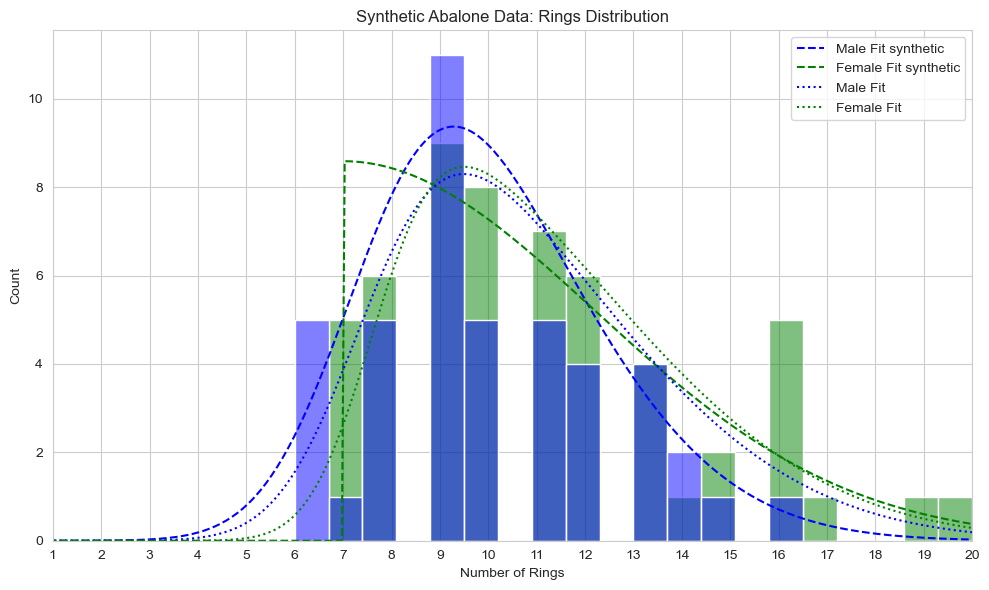

In [6]:
# --- Generative Model ---
def generate_abalone(n_samples=1000):
    """
    Generates synthetic Abalone data based on fitted skewed normal distributions.

    Args:
        n_samples (int): The number of synthetic samples to generate.

    Returns:
        pandas.DataFrame: A DataFrame containing synthetic Abalone data.
    """
    synthetic_data = []

    for _ in range(n_samples):
        # Choose Sex (Male or Female) with equal probability
        sex = np.random.choice(['Male', 'Female'])

        # Generate Rings based on the chosen Sex
        if sex == 'Male':
            rings = int(round(skewnorm.rvs(*male_params)))
        else:
            rings = int(round(skewnorm.rvs(*female_params)))

        # Ensure Rings is within a reasonable range (non-negative)
        rings = max(1, rings)

        synthetic_data.append({'Sex': sex, 'Rings': rings})

    return pd.DataFrame(synthetic_data)

# --- Generate Synthetic Data ---
synthetic_abalone = generate_abalone(n_samples=100)

# Skewed normal distribution model for Rings by Sex
male_rings_synthetic = synthetic_abalone[synthetic_abalone['Sex'] == 'Male']['Rings']
female_rings__synthetic = synthetic_abalone[synthetic_abalone['Sex'] == 'Female']['Rings']

# Fit skewed normal distributions
male_params_synthetic = skewnorm.fit(male_rings_synthetic)
print("Male parameters", male_params_synthetic)
female_params_synthetic = skewnorm.fit(female_rings__synthetic)
print("Female parameters", female_params_synthetic)

# --- Visualization of Synthetic Data ---
plt.figure(figsize=(10, 6))
sns.histplot(data=synthetic_abalone, x='Rings', hue='Sex', bins=int(synthetic_abalone['Rings'].max()), palette={'Male': 'blue', 'Female': 'green'})

# Plot fitted distributions synthetic
sex_counts_synthetic = synthetic_abalone['Sex'].value_counts()
plt.plot(x, skewnorm.pdf(x, *male_params_synthetic)*sex_counts_synthetic.max(), color='blue', linestyle='dashed', label='Male Fit synthetic')
plt.plot(x, skewnorm.pdf(x, *female_params_synthetic)*sex_counts_synthetic.max(), color='green', linestyle='dashed', label='Female Fit synthetic')

# Plot fitted distributions
sex_counts_synthetic = synthetic_abalone['Sex'].value_counts()
plt.plot(x, skewnorm.pdf(x, *male_params)*sex_counts_synthetic.max(), color='blue', linestyle=':', label='Male Fit')
plt.plot(x, skewnorm.pdf(x, *female_params)*sex_counts_synthetic.max(), color='green', linestyle=':', label='Female Fit ')

plt.title("Synthetic Abalone Data: Rings Distribution")
plt.xlabel("Number of Rings")
plt.ylabel("Count")
plt.xlim(1, synthetic_abalone['Rings'].max())
plt.xticks(np.arange(1, int(synthetic_abalone['Rings'].max()) + 1, 1))
plt.legend()
plt.tight_layout()
plt.show()

      Sex  Length  Diameter  Height  WholeWeight  ShuckedWeight  \
0       1   0.455     0.365   0.095       0.5140         0.2245   
1       1   0.350     0.265   0.090       0.2255         0.0995   
2       0   0.530     0.420   0.135       0.6770         0.2565   
3       1   0.440     0.365   0.125       0.5160         0.2155   
4       2   0.330     0.255   0.080       0.2050         0.0895   
...   ...     ...       ...     ...          ...            ...   
4172    0   0.565     0.450   0.165       0.8870         0.3700   
4173    1   0.590     0.440   0.135       0.9660         0.4390   
4174    1   0.600     0.475   0.205       1.1760         0.5255   
4175    0   0.625     0.485   0.150       1.0945         0.5310   
4176    1   0.710     0.555   0.195       1.9485         0.9455   

      VisceraWeight  ShellWeight  Rings  
0            0.1010       0.1500     15  
1            0.0485       0.0700      7  
2            0.1415       0.2100      9  
3            0.1140       0

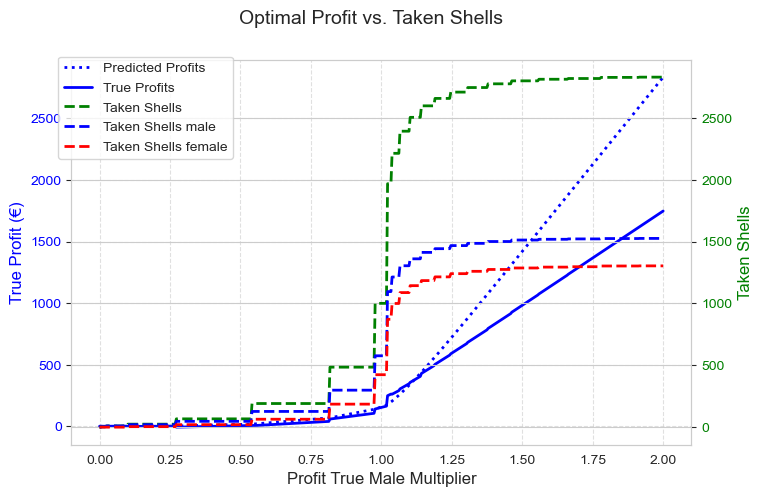

In [7]:
# Correct Encoding
data_encoded = data.copy()
sex_mapping = {'M': 1, 'F': 0, 'I': 2}  # Explicit Mapping
data_encoded['Sex'] = data_encoded['Sex'].map(sex_mapping)
print(data_encoded)

# Remove Infants (I=2)
data_filtered = data_encoded[data_encoded['Sex'] != 2]

X = data_filtered[['Rings']].values  # Ensure X is 2D
y = data_filtered['Sex'].values  # Labels (0 for Male, 1 for Female)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)  # Ensure its shape (N,1)
y_val = torch.tensor(y_val, dtype=torch.float32).unsqueeze(1)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)
def find_threshold(profit_true_male, cost_true_female, data):
    x = np.linspace(0, data['Rings'].max(), 500)
    # Calculate PDFs
    male_pdf = skewnorm.pdf(x, *male_params)
    female_pdf = skewnorm.pdf(x, *female_params)
    profits = []
    for threshold in thresholds:
        # Compute probability mass above threshold using PDFs
        TP = np.trapz(male_pdf[x <= threshold], x[x <= threshold])
        FP_F = np.trapz(female_pdf[x <= threshold], x[x <= threshold])
        # Compute profit
        profit_true = (TP * profit_true_male + FP_F * (cost_true_female))*data.shape[0]
        # print(f'Threshold: {threshold:.2f}, Profit: {profit:.2f}, TP: {TP:.2f}, FP_F: {FP_F:.2f}')
        profits.append(profit_true)

    # Find an optimal threshold
    optimal_index = np.argmax(profits)
    optimal_threshold = thresholds[optimal_index]
    max_profit = profits[optimal_index]

    # Filter data based on optimal threshold
    data_classified = data[data['Rings'] <= optimal_threshold]
    males_selected = (data_classified['Sex'] == 1).sum()
    females_selected = (data_classified['Sex'] == 0).sum()

    # Compute total profit
    profit_true = ((data_classified['Sex'] == 1) * profit_true_male + (data_classified['Sex'] == 0) * (cost_true_female)).sum()

    # print(f"Optimal Threshold: {optimal_threshold:.2f}, Max Profit: €{max_profit:.2f}")
    # print(f"True Profit from classification: €{profit_true:.2f}")

    return optimal_threshold, profits, max_profit, profit_true, (data['Rings'] <= optimal_threshold).sum(), males_selected, females_selected


# Simulated data for demonstration
x = np.linspace(0, 2, 500)
optimal_profits = [find_threshold(profit_true_male, -cost_true_female, data_filtered)[2] for profit_true_male in x]
true_profits = [find_threshold(profit_true_male, -cost_true_female, data_filtered)[3] for profit_true_male in x]
taken_shells = [find_threshold(profit_true_male, -cost_true_female, data_filtered)[4] for profit_true_male in x]
taken_male_shells = [find_threshold(profit_true_male, -cost_true_female, data_filtered)[5] for profit_true_male in x]
taken_female_shells = [find_threshold(profit_true_male, -cost_true_female, data_filtered)[6] for profit_true_male in x]
fig, ax1 = plt.subplots(figsize=(8, 5))

# Primary axis (Optimal Profits)
ax1.plot(x, optimal_profits, label="Predicted Profits", color="blue", ls=':', linewidth=2)
ax1.plot(x, true_profits, label="True Profits", color="blue", linewidth=2)
ax1.set_xlabel("Profit True Male Multiplier", fontsize=12)
ax1.set_ylabel("True Profit (€)", fontsize=12, color="blue")
ax1.tick_params(axis='y', labelcolor="blue")
ax1.grid(True, linestyle='--', alpha=0.6)

# Secondary axis (Taken Shells)
ax2 = ax1.twinx()
ax2.plot(x, taken_shells, label="Taken Shells", color="green", linewidth=2, linestyle="dashed")
ax2.plot(x, taken_male_shells, label="Taken Shells male", color="blue", linewidth=2, linestyle="dashed")
ax2.plot(x, taken_female_shells, label="Taken Shells female", color="red", linewidth=2, linestyle="dashed")
ax2.set_ylabel("Taken Shells", fontsize=12, color="green")
ax2.tick_params(axis='y', labelcolor="green")

# Title and Legend
fig.suptitle("Optimal Profit vs. Taken Shells", fontsize=14)
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

# Show the plot
plt.show()

Epoch 001: Train Loss=-0.0405, Val Loss=-0.0479, Train Acc=0.5220, Val Acc=0.5432
  [Profit] Train Avg=0.0623, Val Avg=0.0864
Epoch 010: Train Loss=-0.0692, Val Loss=-0.0725, Train Acc=0.5344, Val Acc=0.5538
  [Profit] Train Avg=0.0747, Val Avg=0.0970
Epoch 020: Train Loss=-0.0781, Val Loss=-0.0794, Train Acc=0.5397, Val Acc=0.5467
  [Profit] Train Avg=0.0800, Val Avg=0.0899
Epoch 030: Train Loss=-0.0824, Val Loss=-0.0852, Train Acc=0.5385, Val Acc=0.5467
  [Profit] Train Avg=0.0788, Val Avg=0.0899
Epoch 040: Train Loss=-0.0845, Val Loss=-0.0878, Train Acc=0.5467, Val Acc=0.5467
  [Profit] Train Avg=0.0870, Val Avg=0.0899
Epoch 050: Train Loss=-0.0844, Val Loss=-0.0886, Train Acc=0.5514, Val Acc=0.5450
  [Profit] Train Avg=0.0917, Val Avg=0.0882
Epoch 060: Train Loss=-0.0864, Val Loss=-0.0889, Train Acc=0.5503, Val Acc=0.5450
  [Profit] Train Avg=0.0905, Val Avg=0.0882
Epoch 070: Train Loss=-0.0873, Val Loss=-0.0891, Train Acc=0.5509, Val Acc=0.5450
  [Profit] Train Avg=0.0911, Val Avg

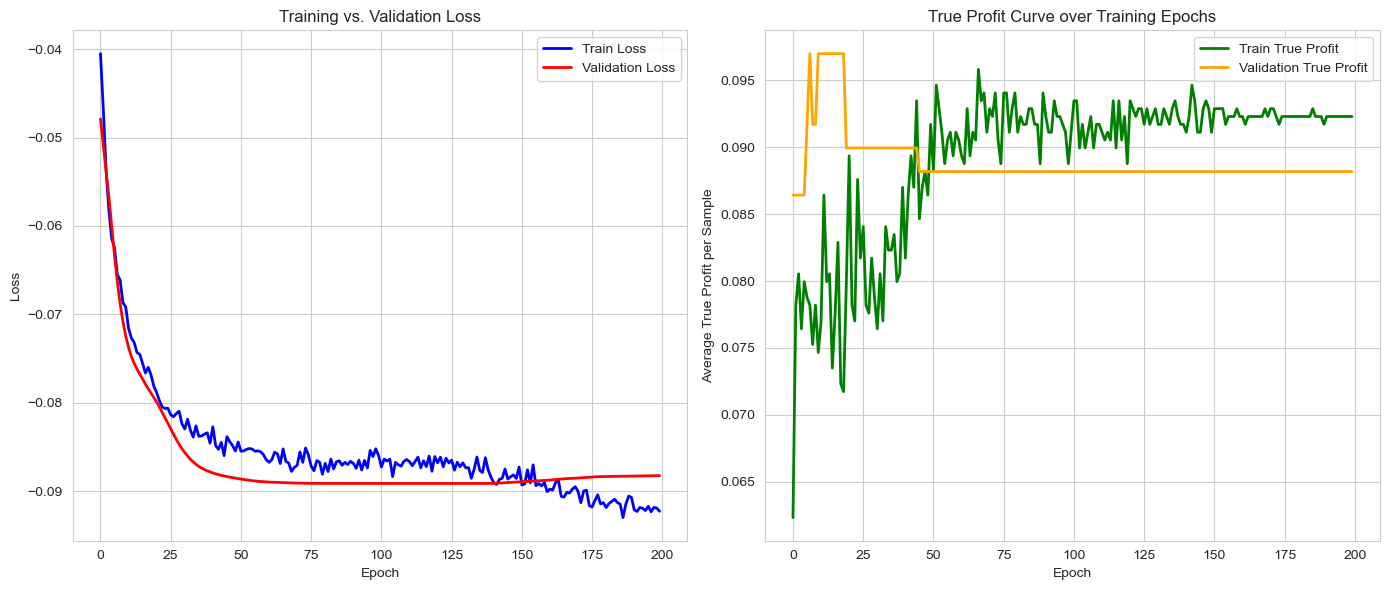

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# === 1. Data Loading & Preprocessing ===
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
columns = ["Sex", "Length", "Diameter", "Height", "WholeWeight",
           "ShuckedWeight", "VisceraWeight", "ShellWeight", "Rings"]
data = pd.read_csv(url, header=None, names=columns)

# Map Sex: 'M' -> 1, 'F' -> 0, 'I' -> 2; remove infants (I)
sex_mapping = {'M': 1, 'F': 0, 'I': 2}
data['Sex'] = data['Sex'].map(sex_mapping)
data = data[data['Sex'] != 2]

# Use only the 'Rings' feature (age proxy)
X = data[['Rings']].values
y = data['Sex'].values

# Standardize the feature
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data: 60% train, 20% validation, 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Convert to torch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_val   = torch.tensor(X_val, dtype=torch.float32)
X_test  = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_val   = torch.tensor(y_val, dtype=torch.float32).unsqueeze(1)
y_test  = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# === 2. Define the Neural Network Model ===
class AbaloneNet(nn.Module):
    def __init__(self, input_dim):
        super(AbaloneNet, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.BatchNorm1d(128),
            nn.LeakyReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.LeakyReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.LeakyReLU(),
            nn.Linear(32, 1)  # Single output (logit)
        )
    def forward(self, x):
        return self.net(x)

# === 3. Define a Custom Profit-Based Loss Function ===
class ProfitLoss(nn.Module):
    def __init__(self, profit_true_male=500, cost_false_positive=1000):
        super(ProfitLoss, self).__init__()
        self.profit_true_male = profit_true_male
        self.cost_false_positive = cost_false_positive
    def forward(self, outputs, targets):
        probabilities = torch.sigmoid(outputs)
        profit = torch.where(targets == 1,
                             probabilities * self.profit_true_male,
                             probabilities * (-self.cost_false_positive))
        loss = -torch.mean(profit)  # maximizing profit == minimizing negative profit
        return loss

# === 4. Initialize Model, Loss, Optimizer & Scheduler ===
input_dim = X_train.shape[1]
model = AbaloneNet(input_dim=input_dim)
# Use the unit profit parameters for training diagnostics:
criterion = ProfitLoss(profit_true_male=profit_true_male, cost_false_positive=cost_true_female)
optimizer = optim.AdamW(model.parameters(), lr=0.003, weight_decay=0.001)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=100)

# === 5. Training Loop with Profit Diagnostics ===
num_epochs = 200
train_losses, val_losses = [], []
train_profit_curve, val_profit_curve = [], []

for epoch in range(1, num_epochs+1):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val)
        val_loss = criterion(val_outputs, y_val)
        val_losses.append(val_loss.item())

    scheduler.step()

    # Compute profit diagnostics using a threshold of 0.5
    train_probs = torch.sigmoid(outputs)
    train_preds = (train_probs >= 0.5).float()
    train_profit = torch.where(train_preds == 1,
                               torch.where(y_train == 1, torch.tensor(profit_true_male, dtype=torch.float32),
                                           torch.tensor(-cost_true_female, dtype=torch.float32)),
                               torch.tensor(0.0))
    train_avg_profit = train_profit.sum().item() / y_train.size(0)
    train_profit_curve.append(train_avg_profit)

    with torch.no_grad():
        val_probs = torch.sigmoid(val_outputs)
        val_preds = (val_probs >= 0.5).float()
        val_profit = torch.where(val_preds == 1,
                                 torch.where(y_val == 1, torch.tensor(profit_true_male, dtype=torch.float32),
                                             torch.tensor(-cost_true_female, dtype=torch.float32)),
                                 torch.tensor(0.0))
        val_avg_profit = val_profit.sum().item() / y_val.size(0)
        val_profit_curve.append(val_avg_profit)

    if epoch % 10 == 0 or epoch == 1:
        train_acc = accuracy_score(y_train.cpu().numpy(), train_preds.cpu().numpy())
        val_acc = accuracy_score(y_val.cpu().numpy(), val_preds.cpu().numpy())
        print(f"Epoch {epoch:03d}: Train Loss={loss.item():.4f}, Val Loss={val_loss.item():.4f}, "
              f"Train Acc={train_acc:.4f}, Val Acc={val_acc:.4f}")
        print(f"  [Profit] Train Avg={train_avg_profit:.4f}, Val Avg={val_avg_profit:.4f}")


# --- Plot Training Progress and True Profit Curves ---
plt.figure(figsize=(14, 6))

# Subplot 1: Training and Validation Loss Curves
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss', color='blue', linewidth=2)
plt.plot(val_losses, label='Validation Loss', color='red', linewidth=2)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs. Validation Loss")
plt.legend()
plt.grid(True)

# Subplot 2: True Profit Curves (Average Profit per Sample)
plt.subplot(1, 2, 2)
plt.plot(train_profit_curve, label='Train True Profit', color='green', linewidth=2)
plt.plot(val_profit_curve, label='Validation True Profit', color='orange', linewidth=2)
plt.xlabel("Epoch")
plt.ylabel("Average True Profit per Sample")
plt.title("True Profit Curve over Training Epochs")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

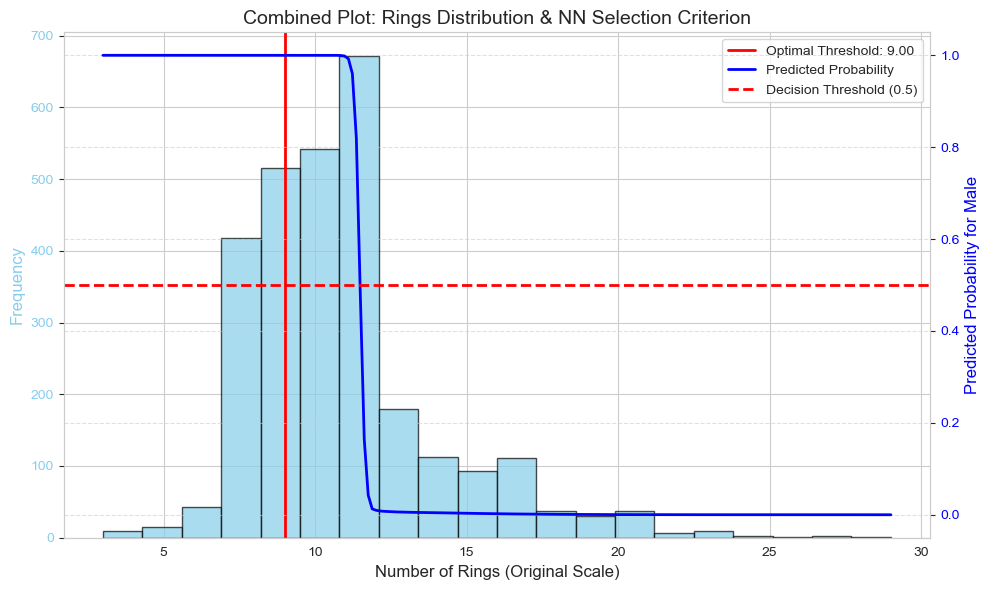

In [9]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# --- Data and Model Setup (Assumed Already Defined) ---
# 'data' is your DataFrame containing the Rings feature.
# 'scaler' is the StandardScaler fitted on the Rings feature.
# 'model' is your trained AbaloneNet neural network.
# 'optimal_threshold' is computed via your threshold optimization code.
# For the NN probability curve, we assume the decision threshold is 0.5.

# Generate a grid of Rings values in the original scale
rings_min = data['Rings'].min()
rings_max = data['Rings'].max()
rings_grid = np.linspace(rings_min, rings_max, 200)

# Scale the grid values using the same scaler used during training.
rings_grid_scaled = scaler.transform(rings_grid.reshape(-1, 1))

# Convert the scaled grid to a torch tensor and compute model probabilities
rings_tensor = torch.tensor(rings_grid_scaled, dtype=torch.float32)
model.eval()
with torch.no_grad():
    probabilities = torch.sigmoid(model(rings_tensor)).numpy().flatten()

# --- Combined Plot with Dual Y-Axes ---
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the histogram (distribution of Rings) on the left y-axis
color_hist = 'skyblue'
ax1.hist(data['Rings'], bins=20, color=color_hist, edgecolor='black', alpha=0.7)
ax1.set_xlabel("Number of Rings (Original Scale)", fontsize=12)
ax1.set_ylabel("Frequency", color=color_hist, fontsize=12)
ax1.tick_params(axis='y', labelcolor=color_hist)
# Overlay the optimal threshold from your threshold optimization
ax1.axvline(optimal_threshold_analytic, color='red', linestyle='-', linewidth=2,
            label=f'Optimal Threshold: {optimal_threshold_analytic:.2f}')

# Create a twin y-axis to plot the predicted probability curve
ax2 = ax1.twinx()
color_prob = 'blue'
ax2.plot(rings_grid, probabilities, color=color_prob, linewidth=2,
         label='Predicted Probability')
ax2.set_ylabel("Predicted Probability for Male", color=color_prob, fontsize=12)
ax2.tick_params(axis='y', labelcolor=color_prob)
# Draw a horizontal line at 0.5 (decision threshold)
ax2.axhline(0.5, color='red', linestyle='--', linewidth=2,
            label='Decision Threshold (0.5)')

# Add a title and combine the legends from both axes
plt.title("Combined Plot: Rings Distribution & NN Selection Criterion", fontsize=14)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Test Accuracy: 0.4991

Neural Network Profit Metrics:
            Total Predicted Profit  Average Predicted Profit  \
Train                   156.732910                  0.092142   
Validation               50.021748                  0.088222   
Test                     17.143810                  0.030236   
All                     223.898483                  0.078977   

            Total True Profit  Average True Profit  
Train                   157.0             0.092299  
Validation               50.0             0.088183  
Test                     17.0             0.029982  
All                     224.0             0.079012  

Statistical Model Profit Metrics:
            Total Profit  Average Profit
Train              108.0        0.063492
Validation          22.0        0.038801
Test                23.0        0.040564
All                153.0        0.053968

Comparison of True Profit Metrics:
      Dataset           Model  Total Profit  Average Profit
0       Train  Neural N

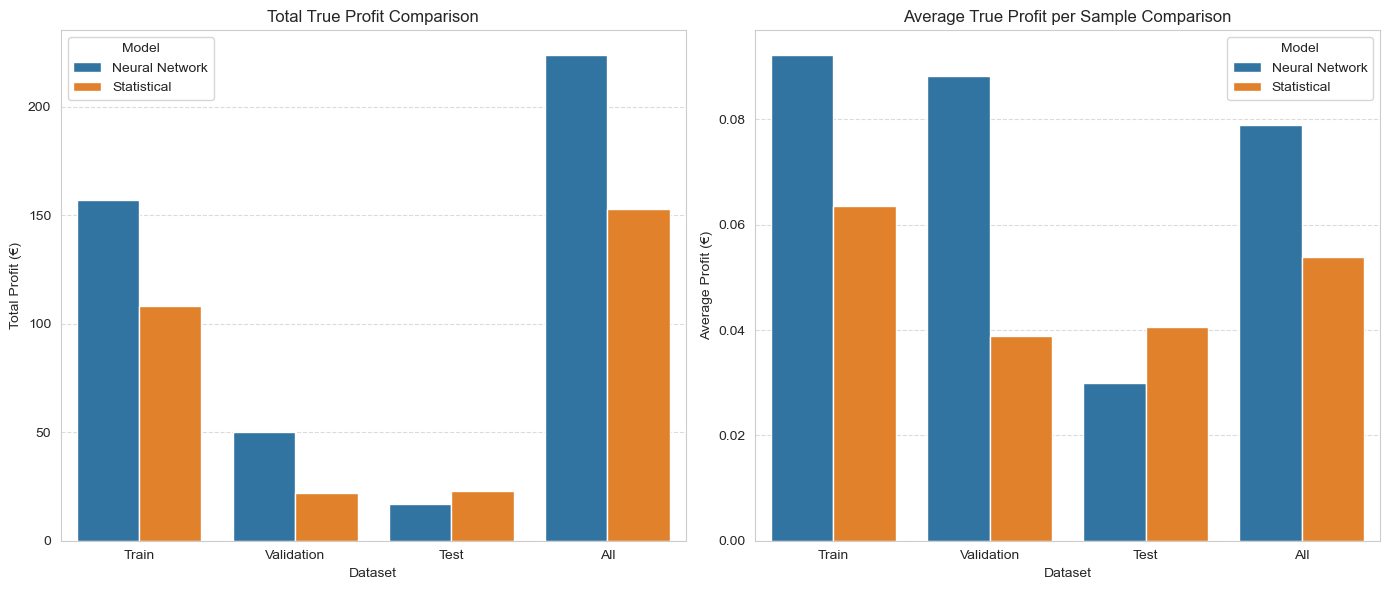

In [10]:
# === 6. Evaluate on Test Set ===
model.eval()
with torch.no_grad():
    test_outputs = model(X_test)
    test_probs = torch.sigmoid(test_outputs)
    test_preds = (test_probs >= 0.5).float()
    test_acc = accuracy_score(y_test.cpu().numpy(), test_preds.cpu().numpy())
print(f"\nTest Accuracy: {test_acc:.4f}")

# === 7. Compute Profit Metrics for NN Model on Various Splits ===
def compute_nn_profit(X_data, y_data):
    with torch.no_grad():
        outputs = model(X_data)
        proba = torch.sigmoid(outputs)
    # Continuous (predicted) profit:
    pred_profit = torch.where(y_data == 1, proba * profit_true_male, proba * (-cost_true_female))
    total_pred_profit = pred_profit.sum().item()
    avg_pred_profit = total_pred_profit / len(y_data)
    # True profit based on threshold 0.5:
    preds = (proba >= 0.5).float()
    true_profit = torch.where(preds == 1,
                              torch.where(y_data == 1, torch.tensor(profit_true_male, dtype=torch.float32),
                                          torch.tensor(-cost_true_female, dtype=torch.float32)),
                              torch.tensor(0.0))
    total_true_profit = true_profit.sum().item()
    avg_true_profit = total_true_profit / len(y_data)
    return total_pred_profit, avg_pred_profit, total_true_profit, avg_true_profit

splits = {
    "Train": (X_train, y_train),
    "Validation": (X_val, y_val),
    "Test": (X_test, y_test),
    "All": (torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.float32).unsqueeze(1))
}
nn_metrics = {}
for split, (Xd, yd) in splits.items():
    tot_pred, avg_pred, tot_true, avg_true = compute_nn_profit(Xd, yd)
    nn_metrics[split] = {
        "Total Predicted Profit": tot_pred,
        "Average Predicted Profit": avg_pred,
        "Total True Profit": tot_true,
        "Average True Profit": avg_true
    }
df_nn = pd.DataFrame(nn_metrics).T
print("\nNeural Network Profit Metrics:")
print(df_nn)

# === 8. Compute Profit Metrics for Statistical (Analytic) Model ===
# Use original (unscaled) data for statistical predictions.
# Statistical rule: predict male if Rings <= optimal_threshold_analytic.
# We split the unscaled data into Train/Validation/Test separately.

data_stat = data[data['Sex'].isin([0, 1])].copy()  # only male/female

from sklearn.model_selection import train_test_split
train_val_data, test_data = train_test_split(data_stat, test_size=0.2, random_state=1)
train_data, val_data = train_test_split(train_val_data, test_size=0.25, random_state=42)

def compute_stat_profit(df, threshold, profit, cost):
    df = df.copy()
    # Statistical model rule: classify as male if Rings <= threshold.
    df['pred_stat'] = (df['Rings'] <= threshold).astype(float)
    # Compute profit: if prediction == 1 and true Sex==1: profit; if prediction == 1 but true Sex==0: -cost; else 0.
    profit_array = np.where(df['pred_stat'] == 1,
                            np.where(df['Sex'] == 1, profit, -cost),
                            0)
    total_profit = profit_array.sum()
    avg_profit = total_profit / len(df)
    return total_profit, avg_profit

# Compute statistical profit for each split separately:
stat_train_total, stat_train_avg = compute_stat_profit(train_data, optimal_threshold_analytic, profit_true_male, cost_true_female)
stat_val_total, stat_val_avg     = compute_stat_profit(val_data, optimal_threshold_analytic, profit_true_male, cost_true_female)
stat_test_total, stat_test_avg   = compute_stat_profit(test_data, optimal_threshold_analytic, profit_true_male, cost_true_female)
stat_all_total, stat_all_avg     = compute_stat_profit(data_stat, optimal_threshold_analytic, profit_true_male, cost_true_female)

stat_metrics = {
    "Train": {"Total Profit": stat_train_total, "Average Profit": stat_train_avg},
    "Validation": {"Total Profit": stat_val_total, "Average Profit": stat_val_avg},
    "Test": {"Total Profit": stat_test_total, "Average Profit": stat_test_avg},
    "All": {"Total Profit": stat_all_total, "Average Profit": stat_all_avg}
}
df_stat = pd.DataFrame(stat_metrics).T
print("\nStatistical Model Profit Metrics:")
print(df_stat)

# === 9. Combine & Plot Comparison of Profit Metrics ===
# Here we compare the NN's "Total True Profit" and "Average True Profit" with the statistical model.
comparison_df = pd.DataFrame({
    "Dataset": ["Train", "Validation", "Test", "All"] * 2,
    "Model": ["Neural Network"] * 4 + ["Statistical"] * 4,
    "Total Profit": [df_nn.loc["Train", "Total True Profit"],
                     df_nn.loc["Validation", "Total True Profit"],
                     df_nn.loc["Test", "Total True Profit"],
                     df_nn.loc["All", "Total True Profit"],
                     df_stat.loc["Train", "Total Profit"],
                     df_stat.loc["Validation", "Total Profit"],
                     df_stat.loc["Test", "Total Profit"],
                     df_stat.loc["All", "Total Profit"]],
    "Average Profit": [df_nn.loc["Train", "Average True Profit"],
                       df_nn.loc["Validation", "Average True Profit"],
                       df_nn.loc["Test", "Average True Profit"],
                       df_nn.loc["All", "Average True Profit"],
                       df_stat.loc["Train", "Average Profit"],
                       df_stat.loc["Validation", "Average Profit"],
                       df_stat.loc["Test", "Average Profit"],
                       df_stat.loc["All", "Average Profit"]]
})
print("\nComparison of True Profit Metrics:")
print(comparison_df)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x="Dataset", y="Total Profit", hue="Model", data=comparison_df, ax=axes[0])
axes[0].set_title("Total True Profit Comparison")
axes[0].set_ylabel("Total Profit (€)")
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

sns.barplot(x="Dataset", y="Average Profit", hue="Model", data=comparison_df, ax=axes[1])
axes[1].set_title("Average True Profit per Sample Comparison")
axes[1].set_ylabel("Average Profit (€)")
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Epoch 010: Train Loss = 0.6875, Val Loss = 0.6883, Train Acc = 0.5244, Val Acc = 0.5362
Epoch 020: Train Loss = 0.6863, Val Loss = 0.6876, Train Acc = 0.5485, Val Acc = 0.5450
Epoch 030: Train Loss = 0.6853, Val Loss = 0.6872, Train Acc = 0.5367, Val Acc = 0.5467
Epoch 040: Train Loss = 0.6838, Val Loss = 0.6870, Train Acc = 0.5432, Val Acc = 0.5467
Epoch 050: Train Loss = 0.6842, Val Loss = 0.6870, Train Acc = 0.5585, Val Acc = 0.5450
Epoch 060: Train Loss = 0.6840, Val Loss = 0.6872, Train Acc = 0.5544, Val Acc = 0.5379
Epoch 070: Train Loss = 0.6839, Val Loss = 0.6871, Train Acc = 0.5456, Val Acc = 0.5467
Epoch 080: Train Loss = 0.6828, Val Loss = 0.6874, Train Acc = 0.5567, Val Acc = 0.5397
Epoch 090: Train Loss = 0.6848, Val Loss = 0.6874, Train Acc = 0.5391, Val Acc = 0.5450
Epoch 100: Train Loss = 0.6846, Val Loss = 0.6875, Train Acc = 0.5438, Val Acc = 0.5309

Optimal threshold on validation set: 0.52
Maximum profit on validation set: €55.00


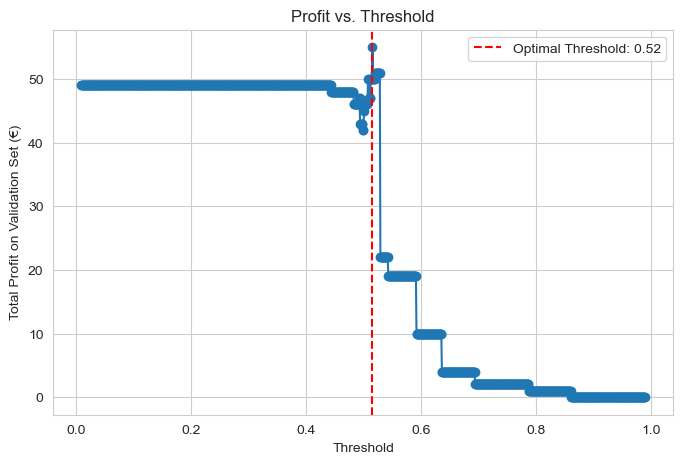

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# --- Define a simple neural network model ---
class AbaloneNet_advanced(nn.Module):
    def __init__(self, input_dim):
        super(AbaloneNet_advanced, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 1)  # Single output (logit) for binary classification
        )

    def forward(self, x):
        return self.net(x)

# Assume X_train, y_train, X_val, y_val, X_test, y_test are already defined
# and standardized appropriately (using StandardScaler, etc.).
input_dim = X_train.shape[1]
model_advanced = AbaloneNet_advanced(input_dim=input_dim)

# --- Training using BCEWithLogitsLoss (Cross-Entropy for Binary Classification) ---
criterion = nn.BCEWithLogitsLoss()  # This loss takes logits directly
optimizer = optim.AdamW(model_advanced.parameters(), lr=0.003)

num_epochs = 100
train_losses, val_losses = [], []

for epoch in range(1, num_epochs + 1):
    model_advanced.train()
    optimizer.zero_grad()
    outputs = model_advanced(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    model_advanced.eval()
    with torch.no_grad():
        val_outputs = model_advanced(X_val)
        val_loss = criterion(val_outputs, y_val)
        val_losses.append(val_loss.item())

    if epoch % 10 == 0:
        train_probs = torch.sigmoid(outputs)
        train_preds = (train_probs >= 0.5).float()
        val_probs = torch.sigmoid(val_outputs)
        val_preds = (val_probs >= 0.5).float()
        train_acc = accuracy_score(y_train.cpu().numpy(), train_preds.cpu().numpy())
        val_acc = accuracy_score(y_val.cpu().numpy(), val_preds.cpu().numpy())
        print(f"Epoch {epoch:03d}: Train Loss = {loss.item():.4f}, Val Loss = {val_loss.item():.4f}, " +
              f"Train Acc = {train_acc:.4f}, Val Acc = {val_acc:.4f}")


def compute_profit(probs, targets, threshold, profit, cost):
    """Compute total profit given predicted probabilities, true targets, and threshold."""
    preds = (probs >= threshold).float()
    # Profit: if prediction is positive and true label is 1, add profit; if false positive, subtract cost.
    profit_tensor = torch.where(preds == 1,
                                torch.where(targets == 1,
                                            torch.tensor(profit, dtype=torch.float32),
                                            torch.tensor(-cost, dtype=torch.float32)),
                                torch.tensor(0.0))
    return profit_tensor.sum().item()

# Use the validation set for threshold optimization
model_advanced.eval()
with torch.no_grad():
    val_probs = torch.sigmoid(model_advanced(X_val))

thresholds = np.linspace(0.01, 0.99, 1000)  # Search between 0.1 and 0.9
profits = []

for thr in thresholds:
    p = compute_profit(val_probs, y_val, thr, profit_true_male, cost_true_female)
    profits.append(p)

optimal_index = np.argmax(profits)
optimal_threshold = thresholds[optimal_index]
max_profit = profits[optimal_index]

print(f"\nOptimal threshold on validation set: {optimal_threshold :.2f}")
print(f"Maximum profit on validation set: €{max_profit:.2f}")

# --- Visualize Profit vs. Threshold ---
plt.figure(figsize=(8,5))
plt.plot(thresholds, profits, marker='o')
plt.axvline(optimal_threshold , color='red', linestyle='--', label=f'Optimal Threshold: {optimal_threshold :.2f}')
plt.xlabel("Threshold")
plt.ylabel("Total Profit on Validation Set (€)")
plt.title("Profit vs. Threshold")
plt.legend()
plt.grid(True)
plt.show()


Test Accuracy (using threshold 0.52): 0.4974
Test Profit: €16.00


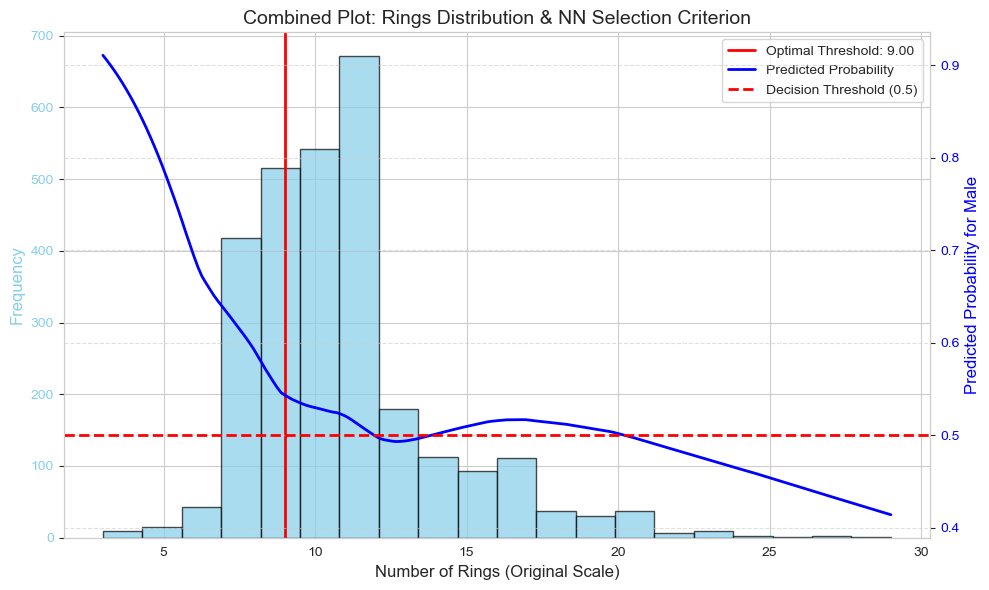

In [12]:
# --- Evaluate on Test Set using the optimal threshold ---
model_advanced.eval()
with torch.no_grad():
    test_probs = torch.sigmoid(model_advanced(X_test))
    test_profit = compute_profit(test_probs, y_test, optimal_threshold , profit_true_male, cost_true_female)
    test_preds = (test_probs >= optimal_threshold ).float()
    test_acc = accuracy_score(y_test.cpu().numpy(), test_preds.cpu().numpy())

print(f"\nTest Accuracy (using threshold {optimal_threshold :.2f}): {test_acc:.4f}")
print(f"Test Profit: €{test_profit:.2f}")
import numpy as np
import torch
import matplotlib.pyplot as plt

# --- Data and model_advanced Setup (Assumed Already Defined) ---
# 'data' is your DataFrame containing the Rings feature.
# 'scaler' is the StandardScaler fitted on the Rings feature.
# 'model' is your trained AbaloneNet neural network.
# 'optimal_threshold' is computed via your threshold optimization code.
# For the NN probability curve, we assume the decision threshold is 0.5.

# Generate a grid of Rings values in the original scale
rings_min = data['Rings'].min()
rings_max = data['Rings'].max()
rings_grid = np.linspace(rings_min, rings_max, 200)

# Scale the grid values using the same scaler used during training.
rings_grid_scaled = scaler.transform(rings_grid.reshape(-1, 1))

# Convert the scaled grid to a torch tensor and compute model probabilities
rings_tensor = torch.tensor(rings_grid_scaled, dtype=torch.float32)
model_advanced.eval()
with torch.no_grad():
    probabilities = torch.sigmoid(model_advanced(rings_tensor)).numpy().flatten()

# --- Combined Plot with Dual Y-Axes ---
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the histogram (distribution of Rings) on the left y-axis
color_hist = 'skyblue'
ax1.hist(data['Rings'], bins=20, color=color_hist, edgecolor='black', alpha=0.7)
ax1.set_xlabel("Number of Rings (Original Scale)", fontsize=12)
ax1.set_ylabel("Frequency", color=color_hist, fontsize=12)
ax1.tick_params(axis='y', labelcolor=color_hist)
# Overlay the optimal threshold from your threshold optimization
ax1.axvline(optimal_threshold_analytic, color='red', linestyle='-', linewidth=2,
            label=f'Optimal Threshold: {optimal_threshold_analytic:.2f}')

# Create a twin y-axis to plot the predicted probability curve
ax2 = ax1.twinx()
color_prob = 'blue'
ax2.plot(rings_grid, probabilities, color=color_prob, linewidth=2,
         label='Predicted Probability')
ax2.set_ylabel("Predicted Probability for Male", color=color_prob, fontsize=12)
ax2.tick_params(axis='y', labelcolor=color_prob)
# Draw a horizontal line at 0.5 (decision threshold)
ax2.axhline(0.5, color='red', linestyle='--', linewidth=2,
            label='Decision Threshold (0.5)')

# Add a title and combine the legends from both axes
plt.title("Combined Plot: Rings Distribution & NN Selection Criterion", fontsize=14)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



Test Accuracy: 0.5097

Neural Network Profit Metrics:
            Total Predicted Profit  Average Predicted Profit  \
Train                    83.372849                  0.049014   
Validation               28.002470                  0.049387   
Test                     20.026735                  0.035321   
All                     131.402054                  0.046350   

            Total True Profit  Average True Profit  
Train                   168.0             0.098765  
Validation               42.0             0.074074  
Test                     23.0             0.040564  
All                     233.0             0.082187  

Statistical Model Profit Metrics:
            Total Profit  Average Profit
Train              108.0        0.063492
Validation          22.0        0.038801
Test                23.0        0.040564
All                153.0        0.053968

Comparison of True Profit Metrics:
      Dataset           Model  Total Profit  Average Profit
0       Train  Neural N

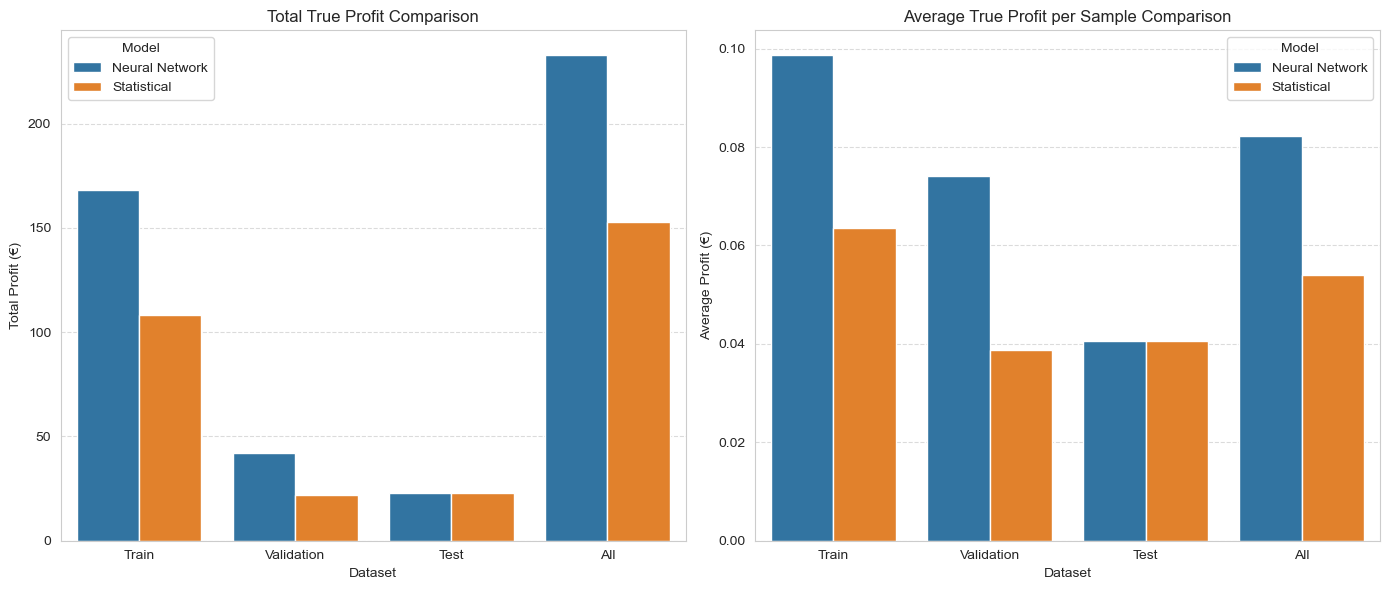

In [13]:
# === 6. Evaluate on Test Set ===
model_advanced.eval()
with torch.no_grad():
    test_outputs = model_advanced(X_test)
    test_probs = torch.sigmoid(test_outputs)
    test_preds = (test_probs >= 0.5).float()
    test_acc = accuracy_score(y_test.cpu().numpy(), test_preds.cpu().numpy())
print(f"\nTest Accuracy: {test_acc:.4f}")

# === 7. Compute Profit Metrics for NN Model on Various Splits ===
def compute_nn_profit(X_data, y_data):
    with torch.no_grad():
        outputs = model_advanced(X_data)
        proba = torch.sigmoid(outputs)
    # Continuous (predicted) profit:
    pred_profit = torch.where(y_data == 1, proba * profit_true_male, proba * (-cost_true_female))
    total_pred_profit = pred_profit.sum().item()
    avg_pred_profit = total_pred_profit / len(y_data)
    # True profit based on threshold 0.5:
    preds = (proba >= 0.5).float()
    true_profit = torch.where(preds == 1,
                              torch.where(y_data == 1, torch.tensor(profit_true_male, dtype=torch.float32),
                                          torch.tensor(-cost_true_female, dtype=torch.float32)),
                              torch.tensor(0.0))
    total_true_profit = true_profit.sum().item()
    avg_true_profit = total_true_profit / len(y_data)
    return total_pred_profit, avg_pred_profit, total_true_profit, avg_true_profit

splits = {
    "Train": (X_train, y_train),
    "Validation": (X_val, y_val),
    "Test": (X_test, y_test),
    "All": (torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.float32).unsqueeze(1))
}
nn_metrics = {}
for split, (Xd, yd) in splits.items():
    tot_pred, avg_pred, tot_true, avg_true = compute_nn_profit(Xd, yd)
    nn_metrics[split] = {
        "Total Predicted Profit": tot_pred,
        "Average Predicted Profit": avg_pred,
        "Total True Profit": tot_true,
        "Average True Profit": avg_true
    }
df_nn = pd.DataFrame(nn_metrics).T
print("\nNeural Network Profit Metrics:")
print(df_nn)

# === 8. Compute Profit Metrics for Statistical (Analytic) Model ===
# Use original (unscaled) data for statistical predictions.
# Statistical rule: predict male if Rings <= optimal_threshold_analytic.
# We split the unscaled data into Train/Validation/Test separately.

data_stat = data[data['Sex'].isin([0, 1])].copy()  # only male/female

from sklearn.model_selection import train_test_split
train_val_data, test_data = train_test_split(data_stat, test_size=0.2, random_state=1)
train_data, val_data = train_test_split(train_val_data, test_size=0.25, random_state=42)

def compute_stat_profit(df, threshold, profit, cost):
    df = df.copy()
    # Statistical model rule: classify as male if Rings <= threshold.
    df['pred_stat'] = (df['Rings'] <= threshold).astype(float)
    # Compute profit: if prediction == 1 and true Sex==1: profit; if prediction == 1 but true Sex==0: -cost; else 0.
    profit_array = np.where(df['pred_stat'] == 1,
                            np.where(df['Sex'] == 1, profit, -cost),
                            0)
    total_profit = profit_array.sum()
    avg_profit = total_profit / len(df)
    return total_profit, avg_profit

# Compute statistical profit for each split separately:
stat_train_total, stat_train_avg = compute_stat_profit(train_data, optimal_threshold_analytic, profit_true_male, cost_true_female)
stat_val_total, stat_val_avg     = compute_stat_profit(val_data, optimal_threshold_analytic, profit_true_male, cost_true_female)
stat_test_total, stat_test_avg   = compute_stat_profit(test_data, optimal_threshold_analytic, profit_true_male, cost_true_female)
stat_all_total, stat_all_avg     = compute_stat_profit(data_stat, optimal_threshold_analytic, profit_true_male, cost_true_female)

stat_metrics = {
    "Train": {"Total Profit": stat_train_total, "Average Profit": stat_train_avg},
    "Validation": {"Total Profit": stat_val_total, "Average Profit": stat_val_avg},
    "Test": {"Total Profit": stat_test_total, "Average Profit": stat_test_avg},
    "All": {"Total Profit": stat_all_total, "Average Profit": stat_all_avg}
}
df_stat = pd.DataFrame(stat_metrics).T
print("\nStatistical Model Profit Metrics:")
print(df_stat)

# === 9. Combine & Plot Comparison of Profit Metrics ===
# Here we compare the NN's "Total True Profit" and "Average True Profit" with the statistical model.
comparison_df = pd.DataFrame({
    "Dataset": ["Train", "Validation", "Test", "All"] * 2,
    "Model": ["Neural Network"] * 4 + ["Statistical"] * 4,
    "Total Profit": [df_nn.loc["Train", "Total True Profit"],
                     df_nn.loc["Validation", "Total True Profit"],
                     df_nn.loc["Test", "Total True Profit"],
                     df_nn.loc["All", "Total True Profit"],
                     df_stat.loc["Train", "Total Profit"],
                     df_stat.loc["Validation", "Total Profit"],
                     df_stat.loc["Test", "Total Profit"],
                     df_stat.loc["All", "Total Profit"]],
    "Average Profit": [df_nn.loc["Train", "Average True Profit"],
                       df_nn.loc["Validation", "Average True Profit"],
                       df_nn.loc["Test", "Average True Profit"],
                       df_nn.loc["All", "Average True Profit"],
                       df_stat.loc["Train", "Average Profit"],
                       df_stat.loc["Validation", "Average Profit"],
                       df_stat.loc["Test", "Average Profit"],
                       df_stat.loc["All", "Average Profit"]]
})
print("\nComparison of True Profit Metrics:")
print(comparison_df)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x="Dataset", y="Total Profit", hue="Model", data=comparison_df, ax=axes[0])
axes[0].set_title("Total True Profit Comparison")
axes[0].set_ylabel("Total Profit (€)")
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

sns.barplot(x="Dataset", y="Average Profit", hue="Model", data=comparison_df, ax=axes[1])
axes[1].set_title("Average True Profit per Sample Comparison")
axes[1].set_ylabel("Average Profit (€)")
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# The situation changes

In [50]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import skewnorm

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
#import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tqdm import tqdm


from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_curve, auc

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
columns = ["Sex", "Length", "Diameter", "Height", "WholeWeight", "ShuckedWeight", "VisceraWeight", "ShellWeight", "Rings"]
data_original = pd.read_csv(url, names=columns)



<Figure size 1000x600 with 0 Axes>

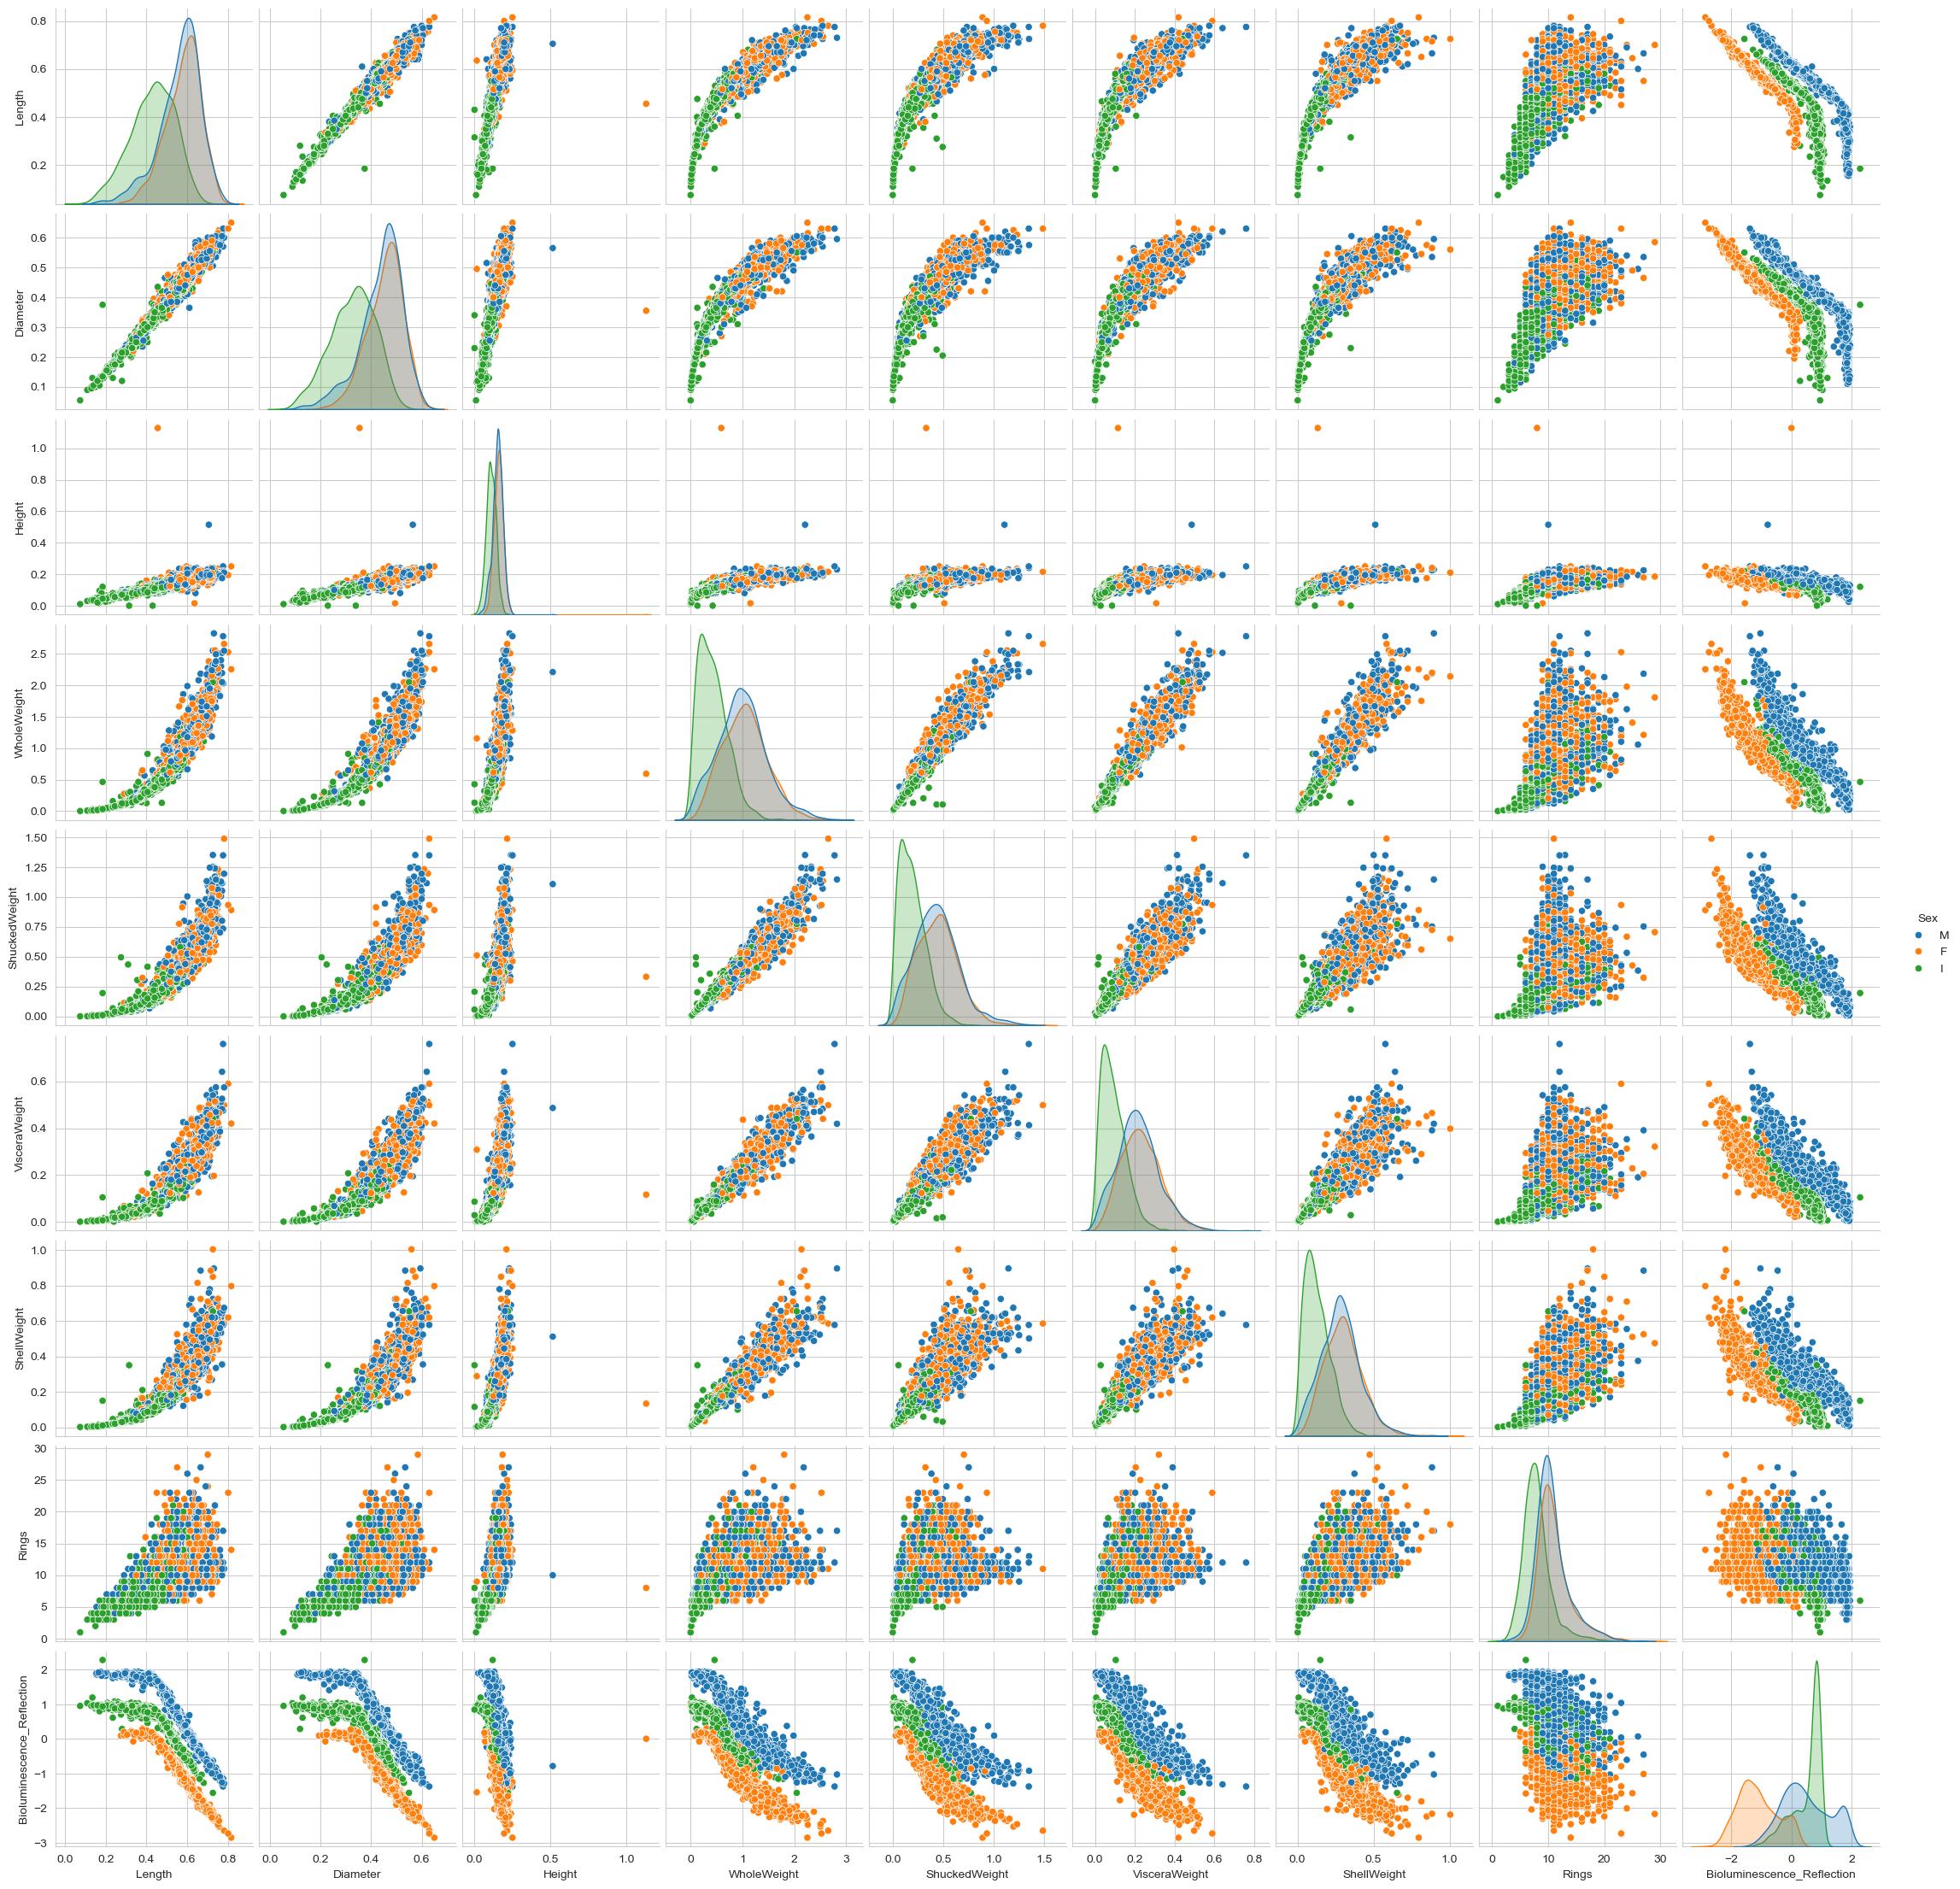

In [51]:
# Encode Sex
data = data_original.copy()
data_encoded = data_original.copy()
data_encoded['Sex'] = LabelEncoder().fit_transform(data_encoded['Sex'])  # M=0, F=1, I=2

differentiation_factor = 0.5
# Add Artificial Feature: Improved Bioluminescence Reflection Calculation
data["Bioluminescence_Reflection"] = np.sqrt(
    np.exp(-data_encoded["Length"]) * np.exp(-abs(np.log(data_encoded["Diameter"] + data_encoded["Diameter"].max())) )/ (1 +  abs(differentiation_factor*data_encoded["Sex"] - data_encoded["Sex"].max() * 1.5))
)

# Normalize Feature
scaler = StandardScaler()
data[['Bioluminescence_Reflection']] = scaler.fit_transform(data[['Bioluminescence_Reflection']])

# Visualization
plt.figure(figsize=(10, 6))
sns.pairplot(data, hue='Sex', diag_kind='kde')
plt.show()

In [ ]:


# --- Map Sex and Remove Infants ---
# Mapping: F -> 0, M -> 1, I -> 2
sex_mapping = {'M': 1, 'F': 0, 'I': 2}
data['Sex'] = data_original['Sex'].map(sex_mapping)


# --- Prepare Train/Validation Split ---
# selected_features = ['Length', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight',
#                 'VisceraWeight', 'ShellWeight', 'Rings', 'Bioluminescence_Reflection']
# --- Prepare Train/Validation Split ---
selected_features = ['Length', 'Diameter', 'Height', 'Rings', 'Bioluminescence_Reflection']
X = data[selected_features].values
y = data['Sex'].values
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Convert to Torch Tensors ---
X_train = torch.tensor(X_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)  # For classification
y_val = torch.tensor(y_val, dtype=torch.long)


# Set device (use GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# --- Define Neural Network Model ---
class AbaloneNet(nn.Module):
    def __init__(self, input_dim):
        super(AbaloneNet, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            # nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            # nn.Dropout(0.1),
            nn.Linear(32, 3)  # Output logits for 3 classes: F, M, I
        )

    def forward(self, x):
        return self.net(x)

# --- Define Custom Profit-Based Loss ---
class ProfitLoss(nn.Module):
    def __init__(self):
        super(ProfitLoss, self).__init__()
        # Mapping: F=0, M=1, I=2.
        # We want to reward predictions of "M" when true is M, and penalize if a female or infant is classified as male.
        # Only the probability for class "M" (index 1) is used.
        self.cost_matrix = torch.tensor([
            [0, -1.000, -1],   # For F (class 0)
            [-1,  1.000, -1],   # For M (class 1)
            [-1, -1.500, 0]    # For I (class 2)
        ], dtype=torch.float32)

    def forward(self, y_pred, y_true):
        # Compute predicted probabilities via softmax
        probs = torch.softmax(y_pred, dim=1)
        profits = torch.zeros(len(y_true), dtype=torch.float32, device=y_pred.device)
        for i in range(len(y_true)):
            true_class = y_true[i].item()  # Should be 0, 1, or 2
            # Profit is computed solely on the predicted probability for class "M" (index 1)
            profit = probs[i] @ self.cost_matrix[true_class].T
            profits[i] = profit
        # We want to maximize profit, so we minimize the negative mean profit.
        return -torch.mean(profits)

# --- Initialize Model, Loss, Optimizer, Scheduler ---
model = AbaloneNet(input_dim=X_train.shape[1]).to(device)
criterion = ProfitLoss().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=10, factor=0.5, verbose=True)

# Optional: Set up checkpointing for the best model and early stopping
best_val_loss = float('inf')
best_model_state = None
early_stop_counter = 0
early_stop_patience = 100  # Stop if no improvement for 50 epochs

# --- Training Loop with Early Stopping ---
epochs = 2000


train_losses = []
val_losses = []
val_accuracies = []

pbar = tqdm(range(1, epochs + 1), desc="Training Progress")
for epoch in pbar:
    model.train()
    optimizer.zero_grad()
    X_train_device = X_train.to(device)
    y_train_device = y_train.to(device)
    outputs = model(X_train_device)
    train_loss = criterion(outputs, y_train_device)
    train_loss.backward()
    optimizer.step()
    train_losses.append(train_loss.item())

    model.eval()
    with torch.no_grad():
        X_val_device = X_val.to(device)
        y_val_device = y_val.to(device)
        val_outputs = model(X_val_device)
        val_loss = criterion(val_outputs, y_val_device)
        val_losses.append(val_loss.item())

        # Calculate validation accuracy
        val_preds = torch.argmax(torch.softmax(val_outputs, dim=1), dim=1)
        val_acc = accuracy_score(y_val_device.cpu().numpy(), val_preds.cpu().numpy())
        val_accuracies.append(val_acc)

    scheduler.step(val_loss)

    # Check for improvement and implement early stopping
    if val_loss.item() < best_val_loss:
        best_val_loss = val_loss.item()
        best_model_state = model.state_dict()
        early_stop_counter = 0  # reset counter if improvement occurs
    else:
        early_stop_counter += 1

    if early_stop_counter >= early_stop_patience:
        pbar.write(f"Early stopping at epoch {epoch} with Val Loss: {best_val_loss:.8f}")
        break

    # Update tqdm progress bar with current metrics
    pbar.set_postfix({
        "Train Loss": f"{train_loss.item():.8}",
        "Val Loss": f"{val_loss.item():.8}",
        "Val Acc": f"{val_acc:.12f}",
        "LR": f"{optimizer.param_groups[0]['lr']:.8f}",
        "ES": early_stop_counter
    })

# Optionally, load the best model after training
if best_model_state is not None:
    model.load_state_dict(best_model_state)
    print("Best model loaded with Val Loss =", best_val_loss)

# --- Post-Training Analysis and Plots ---

# 1. Learning Curves: Train vs. Validation Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='red')
plt.title('Learning Curves: Train vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# 2. Validation Accuracy Over Epochs
plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Validation Accuracy', color='green')
plt.title('Validation Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

/opt/anaconda3/envs/2025_02_python_3_12/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Using device: cpu


Training Progress:  61%|██████    | 1222/2000 [01:23<00:56, 13.82it/s, Train Loss=-0.36371669, Val Loss=-0.36463654, Val Acc=0.998803827751, LR=0.00050000, ES=0]   

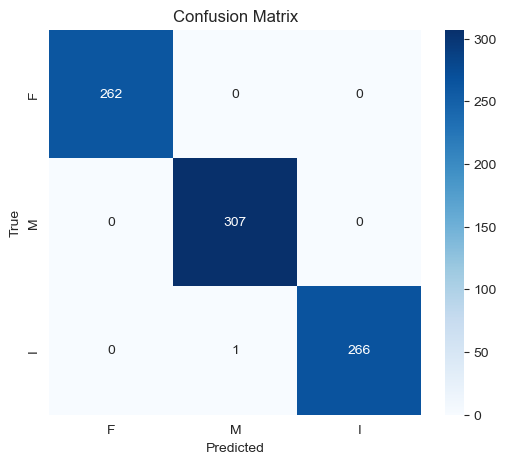

              precision    recall  f1-score   support

           F       1.00      1.00      1.00       262
           M       1.00      1.00      1.00       307
           I       1.00      1.00      1.00       267

    accuracy                           1.00       836
   macro avg       1.00      1.00      1.00       836
weighted avg       1.00      1.00      1.00       836



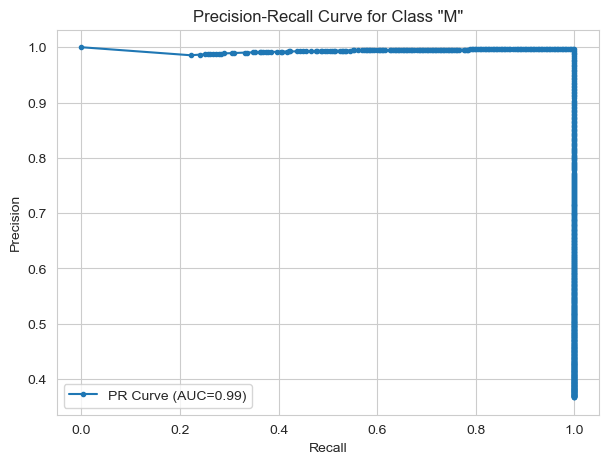

In [49]:
# 3. Confusion Matrix
model.eval()
with torch.no_grad():
    y_pred_logits = model(X_val)
    y_pred_proba = torch.softmax(y_pred_logits, dim=1)
    y_pred = torch.argmax(y_pred_proba, dim=1)
conf_matrix = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['F', 'M', 'I'], yticklabels=['F', 'M', 'I'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 4. Classification Report
report = classification_report(y_val, y_pred, target_names=['F', 'M', 'I'], zero_division=0)
print(report)

# 5. Precision-Recall Curve for Class "M" (class index 1)
# We use the true label indicator (y==1) and the predicted probability for class "M"
precision, recall, pr_thresholds = precision_recall_curve((y_val == 1).numpy(), y_pred_proba[:, 1].numpy())
pr_auc = auc(recall, precision)
plt.figure(figsize=(7, 5))
plt.plot(recall, precision, marker='.', label=f'PR Curve (AUC={pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Class "M"')
plt.legend()
plt.grid(True)
plt.show()


      Dataset  Total Predicted Profit  Average Predicted Profit  \
0       Train              586.446045                  0.175530   
1  Validation              150.061722                  0.179500   
2         All              736.507812                  0.176325   

   Total True Profit  Average True Profit  
0              769.0             0.230171  
1              198.5             0.237440  
2              967.5             0.231626  


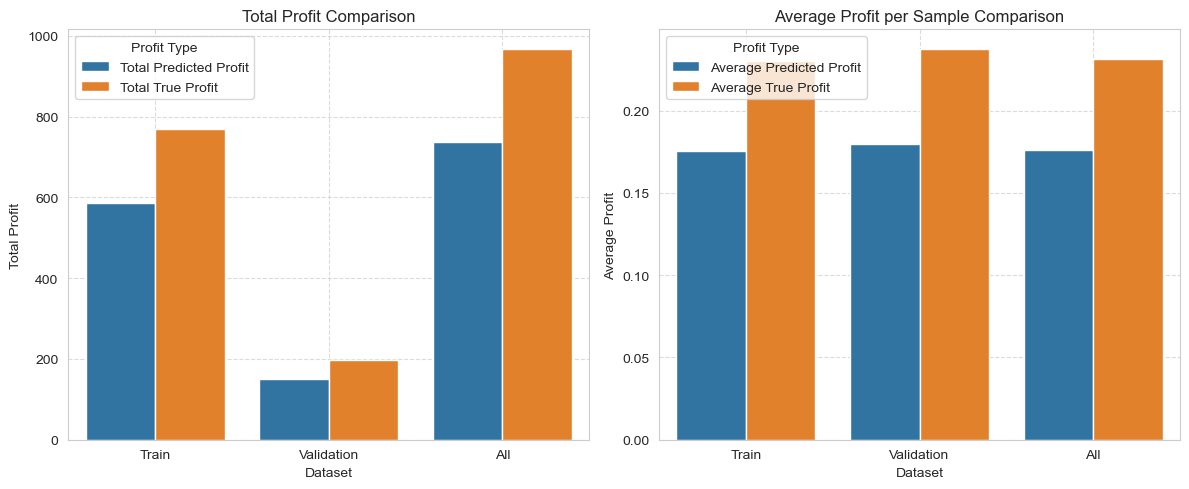

In [41]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------------------------------------------------------
# ASSUMPTIONS:
# - 'model' is your trained PyTorch model.
# - 'X_train', 'y_train', 'X_val', 'y_val' are your training and validation tensors.
# - 'X' and 'y' are the complete datasets (numpy arrays or similar) for the "All" dataset.
# - 'device' is set to "cuda" if available, otherwise "cpu".
# ------------------------------------------------------------------------------

def compute_profit_metrics(model, X, y, device):
    """
    Computes profit metrics on the given dataset.

    For each sample:
      - Continuous (predicted) profit: predicted probability for "M" (class 1) multiplied by
        a multiplier based on the true class:
          * For F (class 0): -1.0
          * For M (class 1): +1.0
          * For I (class 2): -1.5
      - Discrete (true) profit: if the model's predicted class is M (1), profit is the multiplier
        for the true class; otherwise 0.

    Returns:
      total_pred_profit, avg_pred_profit, total_true_profit, avg_true_profit
    """
    model.eval()
    with torch.no_grad():
        # Get model outputs and compute softmax probabilities
        outputs = model(X.to(device))
        probs = torch.softmax(outputs, dim=1)
        # Discrete predictions (argmax)
        discrete_preds = torch.argmax(probs, dim=1)

    # Define multipliers per true class: F=0 -> -1.0, M=1 -> +1.0, I=2 -> -1.5
    multipliers = torch.tensor([-1.0, 1.0, -1.5], device=device)
    true_multiplier = multipliers[y.to(device)]

    # Continuous profit: use predicted probability for class "M" (index 1)
    cont_profit = probs[:, 1] * true_multiplier
    total_pred_profit = cont_profit.sum().item()
    avg_pred_profit = cont_profit.mean().item()

    # Discrete profit: if predicted class is M, assign profit = true_multiplier; otherwise 0.
    discrete_profit = torch.where(discrete_preds == 1, true_multiplier, torch.tensor(0.0, device=device))
    total_true_profit = discrete_profit.sum().item()
    avg_true_profit = discrete_profit.mean().item()

    return total_pred_profit, avg_pred_profit, total_true_profit, avg_true_profit

# --- Compute Metrics for Train and Validation Datasets ---
train_tot_pred, train_avg_pred, train_tot_true, train_avg_true = compute_profit_metrics(model, X_train, y_train, device)
val_tot_pred, val_avg_pred, val_tot_true, val_avg_true = compute_profit_metrics(model, X_val, y_val, device)

# --- Compute Metrics for the Complete Dataset ("All") ---
X_all = torch.tensor(X, dtype=torch.float32)
y_all = torch.tensor(y, dtype=torch.long)
all_tot_pred, all_avg_pred, all_tot_true, all_avg_true = compute_profit_metrics(model, X_all, y_all, device)

# --- Create a DataFrame with the Metrics ---
profit_df = pd.DataFrame({
    "Dataset": ["Train", "Validation", "All"],
    "Total Predicted Profit": [train_tot_pred, val_tot_pred, all_tot_pred],
    "Average Predicted Profit": [train_avg_pred, val_avg_pred, all_avg_pred],
    "Total True Profit": [train_tot_true, val_tot_true, all_tot_true],
    "Average True Profit": [train_avg_true, val_avg_true, all_avg_true]
})

print(profit_df)

# --- Prepare Data for Visualization ---
# Melt the DataFrame for total profit and average profit separately.
profit_melted_total = profit_df.melt(id_vars="Dataset",
                                     value_vars=["Total Predicted Profit", "Total True Profit"],
                                     var_name="Profit Type",
                                     value_name="Total Profit")
profit_melted_avg = profit_df.melt(id_vars="Dataset",
                                   value_vars=["Average Predicted Profit", "Average True Profit"],
                                   var_name="Profit Type",
                                   value_name="Average Profit")

# --- Plotting the Profit Comparison ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Barplot for Total Profit
sns.barplot(x="Dataset", y="Total Profit", hue="Profit Type", data=profit_melted_total, ax=ax1)
ax1.set_title("Total Profit Comparison")
ax1.set_ylabel("Total Profit")
ax1.grid(True, linestyle="--", alpha=0.7)

# Barplot for Average Profit per Sample
sns.barplot(x="Dataset", y="Average Profit", hue="Profit Type", data=profit_melted_avg, ax=ax2)
ax2.set_title("Average Profit per Sample Comparison")
ax2.set_ylabel("Average Profit")
ax2.grid(True, linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

In [19]:
data_original['Sex'].value_counts()

Sex
1    1528
2    1342
0    1307
Name: count, dtype: int64